<h1 align=center><font size = 5>Rui Wu's Final Capstone Project - </font></h1>                                            
<h1 align=center><font size = 5>Finding A Proper Location To Live In Shanghai, China</font></h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Introduce Data Source and Clean Dataset</a>                                                                                

2. <a href="#item2">Explore a Metro Station In Shanghai</a>                                            

3. <a href="#item3">Explore Metro Stations In Shanghai</a>         

4. <a href="#item4">Cluster Metro Stations In Shanghai</a>  

5. <a href="#item5">Find Proper Places To Live In</a>       

6. <a href="#item6">Conclusion And Next Steps</a>                              
    
</font>
</div>

#### Project Background (Introduction/Business Problem Section)

1. Problem                              
Actually this problem is a real problem of myself. I got a job in Shanghai, China, and I came to this city last year. Because I am a consultant, so I often go on business trip to other cities.                                          
Living near metro station is important to me, which make easier for me to access to airport or train station. And besides living near metro station, of course, for living easy and convenient, I want to live in a place where there are restaurants, cafe, fitness centers, pharmacies, supermarkets or malls.
Last year, I lived near Hailun road('海伦路' in Chinese) metro station and this place have all these venues. I like this place. However, I have to move to other places because of the end of house contract and some other reasons, so I want to find a similar place in Shanghai to live in.                      
And my problem is, I want to find a similar place(as Hailun road) to live in, which can meet my following requirements:        
1) near metro station, within 500 meters;                            
2) there are restaurants, cafe, fitness centers, pharmacies, supermarkets or malls around the station;            
3) this station has multi-lines across, which can be more convenient than just 1 line;                  
4) stations near airport and train station are out of consideration because of the daily noise.


2. Who would be interested in this project?                            
1) People who needs to rent apartments in Shanghai, China, like me. You can get some insights of these places to help you make decision of where to live;                                                                          
2) Stakeholders of a renting apartment app, which can provide a recommendation of places to app users based on their conditions.


Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 1. Introduce Data Source And Clean Dataset

#### Data Source (Data Section)

I found geographical coordinates of almost all metro stations in Shanghai from https://download.csdn.net/download/sinat_29675423/10844042. The data is stored in sql file. I downloaded the file and copy these data directly into this notebook.                                        
And I put these data into a dataframe. Each row represents a station and its coordinates. In column 'id', the 1st number is the line number and the 2nd, 3rd number represent the sequence number of stations of each line.                                    
It also needs to be noticed that because some lines are under continual construction in these years, some new stations appear. And the data I use in this project was collected in 2015/07/28 and some was updated in 2018.                     

There are line 1 to 13, 16, 17 of Shanghai metro, so first I create a dataframe named sh_station.

In [2]:
# subway1
subway1 = [(101, '莘庄', 121.385379, 31.111193),
(102, '外环路', 121.393020, 31.120899),
(103, '莲花路', 121.402943, 31.130986),
(104, '锦江乐园', 121.414107, 31.142217),
(105, '上海南站', 121.430041, 31.154579),
(106, '漕宝路', 121.434966, 31.168167),
(107, '上海体育馆', 121.437423, 31.182813),
(108, '徐家汇', 121.436837, 31.195338),
(109, '衡山路', 121.446424, 31.204528),
(110, '常熟路', 121.449141, 31.213524),
(111, '陕西南路', 121.459957, 31.217231),
(112, '黄陂南路', 121.473306, 31.222745),
(113, '人民广场', 121.475719, 31.232770),
(114, '新闸路', 121.468151, 31.238373),
(115, '汉中路', 121.458334, 31.241610),
(116, '上海火车站', 121.458216, 31.249690),
(117, '中山北路', 121.459204, 31.258891),
(118, '延长路', 121.455329, 31.271675),
(119, '上海马戏城', 121.452023, 31.279895),
(120, '汶水路', 121.450251, 31.292556),
(121, '彭浦新村', 121.448642, 31.306604),
(122, '共康路', 121.447063, 31.318936),
(123, '通河新村', 121.441546, 31.331130),
(124, '呼兰路', 121.437711, 31.339703),
(125, '共富新村', 121.434063, 31.355082),
(126, '宝安公路', 121.430914, 31.369555),
(127, '友谊西路', 121.427953, 31.381296),
(128, '富锦路', 121.424661, 31.392260)]

# subway2
subway2 = [(201,'浦东国际机场',121.799283,31.150459),
(202, '海天三路', 121.796878, 31.168459),
(203, '远东大道', 121.755296, 31.199360),
(204, '凌空路', 121.723791, 31.192826),
(205, '川沙', 121.698210, 31.186741),
(206, '华夏东路', 121.681098, 31.196553),
(207, '创新中路', 121.673713, 31.213871),
(208, '唐镇', 121.656547, 31.213340),
(209, '广兰路', 121.621072, 31.211050),
(210, '金科路', 121.601989, 31.204213),
(211, '张江高科', 121.587687, 31.201832),
(212, '龙阳路', 121.557634, 31.203575),
(213, '世纪公园', 121.550909, 31.209421),
(214, '上海科技馆', 121.544313, 31.218771),
(215, '世纪大道', 121.527221, 31.228764),
(216, '东昌路', 121.515556, 31.233270),
(217, '陆家嘴', 121.502262, 31.238195),
(218, '南京东路', 121.484628, 31.238101),
(219, '人民广场', 121.475719, 31.232770),
(220, '南京西路', 121.459971, 31.229853),
(221, '静安寺', 121.446221, 31.223083),
(222, '江苏路', 121.430635, 31.220408),
(223, '中山公园', 121.415741, 31.218014),
(224, '娄山关路', 121.404058, 31.211158),
(225, '威宁路', 121.387285, 31.214870),
(226, '北新泾', 121.373872, 31.216690),
(227, '淞虹路', 121.359588, 31.218212),
(228, '虹桥2号航站楼', 121.326249, 31.194230),
(229, '虹桥火车站', 121.321550, 31.193950),
(230, '徐泾东', 121.299416, 31.188331)]

# subway3
subway3 = [(301, '上海南站', 121.430041, 31.154579),
(302, '石龙路', 121.443205, 31.157949),
(303, '龙漕路', 121.444389, 31.169461),
(304, '漕溪路', 121.438410, 31.176746),
(305, '宜山路', 121.427238, 31.187082),
(306, '虹桥路', 121.420814, 31.197524),
(307, '延安西路', 121.417062, 31.209616),
(308, '中山公园', 121.415741, 31.218014),
(309, '金沙江路', 121.413257, 31.232307),
(310, '曹杨路', 121.417701, 31.239302),
(311, '镇坪路', 121.429779, 31.246369),
(312, '中潭路', 121.441001, 31.254568),
(313, '上海火车站', 121.458216, 31.249690),
(314, '宝山路', 121.476298, 31.251523),
(315, '东宝兴路', 121.480202, 31.259880),
(316, '虹口足球场', 121.479229, 31.271353),
(317, '赤峰路', 121.482429, 31.281247),
(318, '大柏树', 121.483216, 31.289433),
(319, '江湾镇', 121.485082, 31.305546),
(320, '殷高西路', 121.484856, 31.320005),
(321, '长江南路', 121.491482, 31.332062),
(322, '淞发路', 121.500390, 31.345135),
(323, '张华浜', 121.498671, 31.358016),
(324, '淞滨路', 121.492818, 31.370928),
(325, '水产路', 121.488212, 31.381298),
(326, '宝杨路', 121.479574, 31.395315),
(327, '友谊路', 121.475924, 31.404016),
(328, '铁力路', 121.461139, 31.408120),
(329, '江杨北路', 121.439819, 31.407858)]

# subway4
subway4 = [(401, '宜山路', 121.427238, 31.187082),
(402, '上海体育馆', 121.437423, 31.182813),
(403, '上海体育场', 121.443529, 31.185605),
(404, '东安路', 121.454897, 31.190819),
(405, '大木桥路', 121.463278, 31.194057),
(406, '鲁班路', 121.475148, 31.199221),
(407, '西藏南路', 121.489555, 31.201967),
(408, '南浦大桥', 121.499725, 31.208504),
(409, '塘桥', 121.518690, 31.209762),
(410, '蓝村路', 121.527627, 31.211672),
(411, '浦电路', 121.529122, 31.220104),
(412, '世纪大道', 121.527221, 31.228764),
(413, '浦东大道', 121.519385, 31.239974),
(414, '杨树浦路', 121.517210, 31.251935),
(415, '大连路', 121.513088, 31.257938),
(416, '临平路', 121.500696, 31.260874),
(417, '海伦路', 121.488669, 31.259278),
(418, '宝山路', 121.476298, 31.251523),
(419, '上海火车站', 121.458216, 31.249690),
(420, '中潭路', 121.441001, 31.254568),
(421, '镇坪路', 121.429779, 31.246369),
(422, '曹杨路', 121.417701, 31.239302),
(423, '金沙江路', 121.413257, 31.232307),
(424, '中山公园', 121.415741, 31.218014),
(425, '延安西路', 121.417062, 31.209616),
(426, '虹桥路', 121.420814, 31.197524)]

# subway5      
subway5 = [(501, '莘庄', 121.385379, 31.111193),
(502, '春申路', 121.385818, 31.098250),
(503, '银都路', 121.390301, 31.089351),
(504, '颛桥', 121.401868, 31.067013),
(505, '北桥', 121.410054, 31.045112),
(506, '剑川路', 121.416582, 31.026483),
(507, '东川路', 121.419901, 31.018197),
(508, '金平路', 121.410186, 31.011282),
(509, '华宁路', 121.395255, 31.007467),
(510, '文井路', 121.380775, 31.003597),
(511, '闵行开发区', 121.369712, 31.000627)]

# subway6
subway6 = [(601, '港城路', 121.574752, 31.353005),
(602, '外高桥保税区北', 121.586926, 31.347802),
(603, '航津路', 121.593974, 31.335371),
(604, '外高桥保税区南', 121.601963, 31.321578),
(605, '洲海路', 121.589396, 31.312229),
(606, '五洲大道', 121.589212, 31.302569),
(607, '东靖路', 121.588736, 31.290684),
(608, '巨峰路', 121.588365, 31.280684),
(609, '五莲路', 121.587866, 31.272025),
(610, '博兴路', 121.586689, 31.263520),
(611, '金桥路', 121.581817, 31.257084),
(612, '云山路', 121.572775, 31.250413),
(613, '德平路', 121.564237, 31.245400),
(614, '北洋泾路', 121.552314, 31.239145),
(615, '民生路', 121.543527, 31.235851),
(616, '源深体育中心', 121.534642, 31.233004),
(617, '世纪大道', 121.527221, 31.228764),
(618, '浦电路', 121.529122, 31.220104),
(619, '蓝村路', 121.527627, 31.211672),
(620, '上海儿童医学中心', 121.523482, 31.203277),
(621, '临沂新村', 121.516695, 31.193202),
(622, '高科西路', 121.509845, 31.185761),
(623, '东明路', 121.510868, 31.172646),
(624, '高青路', 121.515787, 31.159907),
(625, '华夏西路', 121.514539, 31.149878),
(626, '上南路', 121.506225, 31.149090),
(627, '灵岩南路', 121.495295, 31.148665),
(628, '东方体育中心', 121.480304, 31.153366)]

# subway7
subway7 = [(701, '花木路', 121.562754, 31.211212),
(702, '龙阳路', 121.557634, 31.203575),
(703, '芳华路', 121.550115, 31.193110),
(704, '锦绣路', 121.540041, 31.187592),
(705, '杨高南路', 121.525087, 31.187566),
(706, '高科西路', 121.509845, 31.185761),
(707, '云台路', 121.500439, 31.182212),
(708, '耀华路', 121.494612, 31.178513),
(709, '长清路', 121.486117, 31.174611),
(710, '后滩', 121.473756, 31.171918),
(711, '龙华中路', 121.457472, 31.185093),
(712, '东安路', 121.454897, 31.190819),
(713, '肇嘉浜路', 121.450212, 31.199436),
(714, '常熟路', 121.449141, 31.213524),
(715, '静安寺', 121.446221, 31.223083),
(716, '昌平路', 121.442617, 31.233749),
(717, '长寿路', 121.438435, 31.240930),
(718, '镇坪路', 121.429779, 31.246369),
(719, '岚皋路', 121.421939, 31.256198),
(720, '新村路', 121.422682, 31.263952),
(721, '大华三路', 121.423047, 31.274024),
(722, '行知路', 121.421493, 31.284942),
(723, '大场镇', 121.416548, 31.293320),
(724, '场中路', 121.413661, 31.303685),
(725, '上大路', 121.408580, 31.315071),
(726, '南陈路', 121.398863, 31.321437),
(727, '上海大学', 121.388884, 31.320586),
(728, '祁华路', 121.373569, 31.322315),
(729, '顾村公园', 121.372756, 31.344815),
(730, '刘行', 121.362404, 31.357569),
(731, '潘广路', 121.355845, 31.364182),
(732, '罗南新村', 121.357470, 31.388831),
(733, '美兰湖', 121.349966, 31.401949)]

# subway8
subway8 = [(801, '沈杜公路', 121.512272, 31.061427),
(802, '联航路', 121.510594, 31.073567),
(803, '江月路', 121.508603, 31.084253),
(804, '浦江镇', 121.506272, 31.096590),
(805, '芦恒路', 121.497842, 31.119015),
(806, '凌兆新村', 121.489663, 31.141301),
(807, '东方体育中心', 121.480304, 31.153366),
(808, '杨思', 121.493443, 31.161054),
(809, '成山路', 121.496220, 31.170735),
(810, '耀华路', 121.494612, 31.178513),
(811, '中华艺术宫', 121.493626, 31.185242),
(812, '西藏南路', 121.489555, 31.201967),
(813, '陆家浜路', 121.486115, 31.211789),
(814, '老西门', 121.483679, 31.218969),
(815, '大世界', 121.479326, 31.227182),
(816, '人民广场', 121.475719, 31.232770),
(817, '曲阜路', 121.471543, 31.242307),
(818, '中兴路', 121.469026, 31.253228),
(819, '西藏北路', 121.468769, 31.263505),
(820, '虹口足球场', 121.479229, 31.271353),
(821, '曲阳路', 121.491138, 31.276524),
(822, '四平路', 121.501488, 31.274880),
(823, '鞍山新村', 121.509685, 31.273242),
(824, '江浦路', 121.518379, 31.274946),
(825, '黄兴路', 121.528401, 31.278814),
(826, '延吉中路', 121.534941, 31.288543),
(827, '黄兴公园', 121.533168, 31.295784),
(828, '翔殷路', 121.531974, 31.305002),
(829, '嫩江路', 121.531954, 31.314804),
(830, '市光路', 121.531933, 31.322724)]

# subway9  update
subway9 = [(901, '曹路', 121.689449, 31.277549),
(902, '民雷路', 121.674609, 31.274649),
(903, '顾唐路', 121.663, 31.272188),
(904, '金海路', 121.645202, 31.268948),
(905, '金吉路', 121.634401, 31.26994),
(906, '金桥', 121.619064, 31.266889),
(907, '台儿庄路', 121.603984, 31.258705),
(908, '蓝天路', 121.584168, 31.247521),
(909, '芳甸路', 121.56462, 31.237704),
(910, '杨高中路', 121.548664, 31.227510),
(911, '世纪大道', 121.527221, 31.228764),
(912, '商城路', 121.516295, 31.230327),
(913, '小南门', 121.498398, 31.216866),
(914, '陆家浜', 121.486115, 31.211789),
(915, '马当路', 121.477256, 31.209520),
(916, '打浦桥', 121.468681, 31.206309),
(917, '嘉善路', 121.460704, 31.202820),
(918, '肇嘉浜路', 121.450212, 31.199436),
(919, '徐家汇', 121.436837, 31.195338),
(920, '宜山路', 121.427238, 31.187082),
(921, '桂林路', 121.418065, 31.174760),
(922, '漕河泾开发区', 121.397823, 31.170624),
(923, '合川路', 121.384772, 31.166542),
(924, '星中路', 121.369146, 31.158148),
(925, '七宝', 121.349221, 31.155287),
(926, '中春路', 121.337700, 31.149415),
(927, '九亭', 121.319423, 31.137252),
(928, '泗泾', 121.260247, 31.118272),
(929, '佘山', 121.229686, 31.104097),
(930, '洞泾', 121.230473, 31.084492),
(931, '松江大学城', 121.232577, 31.053984),
(932, '松江新城', 121.230739, 31.030295),
(933, '松江体育中心', 121.230488, 31.015581),
(934, '醉白池', 121.229361, 31.001125),
(935, '松江南站', 121.230884, 30.984818)]

# subway10
subway10 = [(1001, '新江湾城', 121.506951, 31.328496),
(1002, '殷高东路', 121.506797, 31.321768),
(1003, '三门路', 121.508340, 31.313214),
(1004, '江湾体育场', 121.514222, 31.302853),
(1005, '五角场', 121.514632, 31.298043),
(1006, '国权路', 121.510024, 31.289276),
(1007, '同济大学', 121.506357, 31.282086),
(1008, '四平路', 121.501488, 31.274880),
(1009, '邮电新村', 121.494362, 31.268533),
(1010, '海伦路', 121.488669, 31.259278),
(1011, '四川北路', 121.484208, 31.252035),
(1012, '天潼路', 121.482473, 31.243829),
(1013, '南京东路', 121.484628, 31.238101),
(1014, '豫园', 121.487473, 31.227801),
(1015, '老西门', 121.483679, 31.218969),
(1016, '新天地', 121.475182, 31.216367),
(1017, '陕西南路', 121.459957, 31.217231),
(1018, '上海图书馆', 121.444363, 31.207960),
(1019, '交通大学', 121.435253, 31.202213),
(1020, '虹桥路', 121.420814, 31.197524),
(1021, '宋园路', 121.412080, 31.196540),
(1022, '伊犁路', 121.403899, 31.198880),
(1023, '水城路', 121.392259, 31.199482),
(1024, '龙溪路', 121.380034, 31.194400),
(1025, '上海动物园', 121.368137, 31.190246),
(1026, '虹桥1号航站楼', 121.347371, 31.191363),
(1027, '虹桥2号航站楼', 121.326249, 31.194230),
(1028, '虹桥火车站', 121.321550, 31.193950),
(1029, '龙柏新村', 121.370480, 31.176882),
(1030, '紫藤路', 121.364502, 31.169797),
(1031, '航中路', 121.355336, 31.165417)]

# subway11
subway11 = [(1101, '罗山路', 121.593152, 31.153259),
(1102, '御桥', 121.570914, 31.158131),
(1103, '浦三路', 121.539005, 31.150861),
(1104, '三林东', 121.522999, 31.146459),
(1105, '三林', 121.511594, 31.143172),
(1106, '东方体育中心', 121.480304, 31.153366),
(1107, '龙耀路', 121.459702, 31.159720),
(1108, '云锦路', 121.458567, 31.166451),
(1109, '龙华', 121.452958, 31.172672),
(1110, '上海游泳馆', 121.441424, 31.179123),
(1111, '徐家汇', 121.436837, 31.195338),
(1112, '交通大学', 121.435253, 31.202213),
(1113, '江苏路', 121.430635, 31.220408),
(1114, '隆德路', 121.423576, 31.230509),
(1115, '曹杨路', 121.417701, 31.239302),
(1116, '枫桥路', 121.411402, 31.241850),
(1117, '真如', 121.407219, 31.250767),
(1118, '上海西站', 121.400926, 31.262693),
(1119, '李子园', 121.389969, 31.269020),
(1120, '祁连山路', 121.376035, 31.271650),
(1121, '武威路', 121.364678, 31.276646),
(1122, '桃浦新村', 121.349623, 31.281603),
(1123, '南翔', 121.323200, 31.297057),
(1124, '马陆', 121.276906, 31.319675),
(1125, '嘉定新城', 121.254294, 31.330062),
(1126, '白银路', 121.245350, 31.345359),
(1127, '嘉定西站', 121.227872, 31.377124),
(1128, '嘉定北站', 121.237350, 31.391549),
(1129, '上海赛车场', 121.226098, 31.331898),
(1130, '昌吉东路', 121.200384, 31.293620),
(1131, '上海汽车城', 121.180742, 31.285403),
(1132, '安亭', 121.161985, 31.288490),
(1133, '兆丰路', 121.150315, 31.289048),
(1134, '光明路', 121.117186, 31.296210),
(1135, '花桥', 121.104407, 31.298790)]

# subway12  update
subway12 = [(1201, '金海路', 121.638659, 31.263260),
(1202, '申江路', 121.626863, 31.280231),
(1203, '金京路', 121.615477, 31.279823),
(1204, '杨高北路', 121.602960, 31.280092),
(1205, '巨峰路', 121.588365, 31.280684),
(1206, '东陆路', 121.579124, 31.282533),
(1207, '复兴岛', 121.561207, 31.280530),
(1208, '爱国路', 121.552655, 31.279788),
(1209, '隆昌路', 121.544692, 31.275213),
(1210, '宁国路', 121.532328, 31.268612),
(1211, '江浦公园', 121.523697, 31.264570),
(1212, '大连路', 121.513088, 31.257938),
(1213, '提篮桥', 121.506801, 31.253518),
(1214, '国际客运中心', 121.498158, 31.250160),
(1215, '天潼路', 121.482473, 31.243829),
(1216, '曲阜路', 121.471543, 31.242307),
(1217, '汉中路', 121.46524, 31.247193),
(1218, '南京西路', 121.459971, 31.229853),
(1219, '陕西南路', 121.459957, 31.217231),
(1220, '大木桥路', 121.470166, 31.200222),
(1221, '龙华中路', 121.463605, 31.191322),
(1222, '龙华', 121.459229, 31.179259),
(1223, '龙漕路', 121.45062, 31.176283),
(1224, '漕宝路', 121.440961, 31.174604),
(1225, '桂林公园', 121.425093, 31.173038),
(1226, '虹漕路', 121.41697, 31.170066),
(1227, '虹梅路', 121.403932, 31.166073),
(1228, '东兰路', 121.398733, 31.160907),
(1229, '顾戴路', 121.398948, 31.146669),
(1230, '虹莘路', 121.38597, 31.142943),
(1231, '七莘路', 121.341038, 31.167476)]

# subway13  update
subway13 = [(1301, '金运路', 121.319308, 31.240986),
(1302, '金沙江西路', 121.335156, 31.241152),
(1303, '丰庄', 121.355141, 31.242553),
(1304, '祁连山南路', 121.367275, 31.237625),
(1305, '真北路', 121.382049, 31.232215),
(1306, '大渡河路', 121.394509, 31.231754),
(1307, '金沙江路', 121.413257, 31.232307),
(1308, '隆德路', 121.423576, 31.230509),
(1309, '武宁路', 121.430504, 31.234346),
(1310, '长寿路', 121.438435, 31.240930),
(1311, '江宁路', 121.450569, 31.250552),
(1312, '汉中路', 121.46524, 31.247193),
(1313, '自然博物馆', 121.469279, 31.241917),
(1314, '南京西路', 121.459971, 31.229853),
(1315, '淮海中路', 121.470677, 31.226198),
(1316, '新天地', 121.481686, 31.221998),
(1317, '马当路', 121.48331, 31.215357),
(1318, '世博会博物馆', 121.488515, 31.202606),
(1319, '世博大道', 121.490937, 31.188231),
(1320, '长清路', 121.492645, 31.18033),
(1321, '东明路', 121.517488, 31.17825),
(1322, '莲溪路', 121.566177, 31.168975),
(1323, '华夏中路', 121.589873, 31.18115)]

# subway16
subway16 = [(1601, '滴水湖', 121.929583, 30.907245),
(1602, '临港大道', 121.910851, 30.923519),
(1603, '书院', 121.850520, 30.959264),
(1604, '惠南东', 121.793800, 31.026448),
(1605, '惠南', 121.761677, 31.053828),
(1606, '野生动物园', 121.699218, 31.050325),
(1607, '新场', 106.842061, 28.292216),
(1608, '航头东', 121.617494, 31.054919),
(1609, '鹤沙航城', 121.611239, 31.077797),
(1610, '周浦东', 121.606946, 31.110090),
(1611, '罗山路', 121.593152, 31.153259),
(1612, '华夏中路', 121.583109, 31.175759),
(1613, '龙阳路', 121.557634, 31.203575)]

# subway17  
subway17 = [(1701, '虹桥火车站', 121.321550, 31.193950),
(1702, '中国博览会北', 121.561771, 31.211005),
(1703, '蟠龙路', 121.277679, 31.187017),
(1704, '徐盈路', 121.257950, 31.179514),
(1705, '徐泾北城', 121.237140, 31.182759),
(1706, '嘉松中路', 121.219276, 31.174879),
(1707, '赵巷', 121.195457, 31.147995),
(1708, '汇金路', 121.151802, 31.163389),
(1709, '外青松公路', 121.124428, 31.137487),
(1710, '漕盈路', 121.093460, 31.160048),
(1711, '淀山湖大道', 121.094757, 31.142006),
(1712, '朱家角', 121.060234, 31.108959),
(1713, '东方绿舟', 121.007406, 31.099011)]

lines = [subway1,subway2,subway3,subway4,subway5,subway6,subway7,subway8,subway9,subway10,subway11,subway12,subway13,subway16,subway17]
stations = [station for line in lines for station in line]

sh_station = pd.DataFrame(stations)
sh_station.columns = ['id', 'st_name', 'lng', 'lat']
sh_station.head()

id st_name         lng        lat
0  101      莘庄  121.385379  31.111193
1  102     外环路  121.393020  31.120899
2  103     莲花路  121.402943  31.130986
3  104    锦江乐园  121.414107  31.142217
4  105    上海南站  121.430041  31.154579

In [3]:
sh_station.shape


(396, 4)

Here we can see there are 396 stations. However, some stations are the same. So let's check the stations which has multi-lines across there.

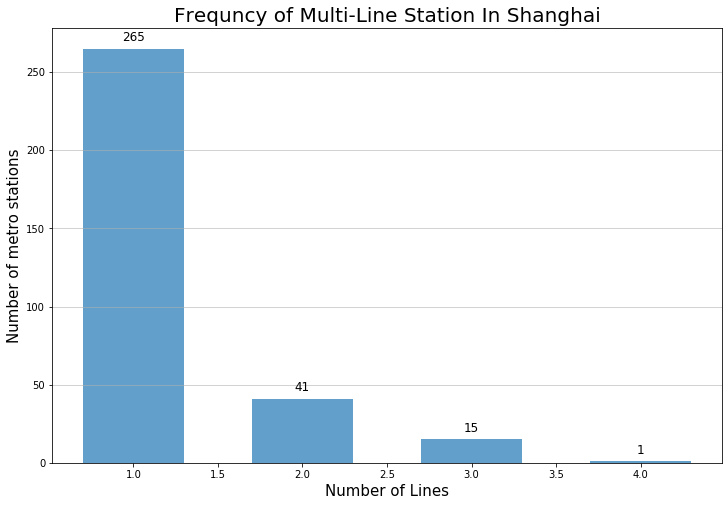

In [4]:
freq = sh_station.groupby('st_name').size()

# visualize number of lines at each station
plt.figure(figsize=(12,8))
plt.hist(freq, bins=[0.5,1.5,2.5,3.5,4.5],alpha=0.7,rwidth=0.6)
plt.title('Frequncy of Multi-Line Station In Shanghai',size=20)
plt.xlabel('Number of Lines',size=15)
plt.ylabel('Number of metro stations',size=15)
plt.grid(axis='y', alpha=0.7)

for i in range(4):
    plt.text(i+1, freq.value_counts().iloc[i]+3, '{}'.format(freq.value_counts().iloc[i]), ha = 'center',va = 'bottom',fontsize=12)


In [5]:
freq_over1 = freq[freq>1]
freq_over1

st_name
上海体育馆      2
上海南站       2
上海火车站      3
世纪大道       4
东安路        2
东方体育中心     3
东明路        2
中山公园       3
中潭路        2
交通大学       2
人民广场       3
华夏中路       2
南京东路       2
南京西路       3
四平路        2
大木桥路       2
大连路        2
天潼路        2
宜山路        3
宝山路        2
巨峰路        2
常熟路        2
延安西路       2
徐家汇        3
新天地        2
曲阜路        2
曹杨路        3
汉中路        3
江苏路        2
浦电路        2
海伦路        2
漕宝路        2
罗山路        2
耀华路        2
老西门        2
肇嘉浜路       2
莘庄         2
蓝村路        2
虹口足球场      2
虹桥2号航站楼    2
虹桥火车站      3
虹桥路        3
西藏南路       2
金沙江路       3
金海路        2
镇坪路        3
长寿路        2
长清路        2
陕西南路       3
隆德路        2
静安寺        2
马当路        2
高科西路       2
龙华         2
龙华中路       2
龙漕路        2
龙阳路        3
dtype: int64

From the data shown above, Hailun Road('海伦路') station has 2 line across. So if I want to find a better place to live in, I had better find a place where the station has over 2 lines across. But 2 lines is also good for me. 

In [6]:
# drop stations near airport and train station
freq_over1 = freq_over1.drop(index=['上海南站','上海火车站','虹桥2号航站楼', '虹桥火车站'])
freq_over1 = freq_over1.sort_values(ascending=False)
freq_over1

st_name
世纪大道      4
龙阳路       3
人民广场      3
汉中路       3
徐家汇       3
宜山路       3
南京西路      3
虹桥路       3
金沙江路      3
镇坪路       3
曹杨路       3
陕西南路      3
东方体育中心    3
中山公园      3
交通大学      2
东明路       2
东安路       2
延安西路      2
常熟路       2
巨峰路       2
宝山路       2
天潼路       2
华夏中路      2
大连路       2
大木桥路      2
四平路       2
中潭路       2
新天地       2
南京东路      2
江苏路       2
曲阜路       2
西藏南路      2
龙华中路      2
龙华        2
高科西路      2
马当路       2
静安寺       2
隆德路       2
长清路       2
长寿路       2
金海路       2
虹口足球场     2
龙漕路       2
蓝村路       2
莘庄        2
肇嘉浜路      2
老西门       2
耀华路       2
罗山路       2
漕宝路       2
海伦路       2
浦电路       2
上海体育馆     2
dtype: int64

In [7]:
freq_over1.shape

(53,)

#### So I will find the proper place to live in, which is one of the freq_over1 and is similar to Hailun road.

#### Clean Dataset

In [8]:
# delete the replicated stations(rows) and just keep the first one
sh_station = sh_station[~sh_station.duplicated(subset='st_name',keep='first')]

In [9]:
# check the results to see if there are replicated stations
sh_station.groupby('st_name').size()

st_name
七宝          1
七莘路         1
三林          1
三林东         1
三门路         1
上南路         1
上大路         1
上海体育场       1
上海体育馆       1
上海儿童医学中心    1
上海动物园       1
上海南站        1
上海图书馆       1
上海大学        1
上海汽车城       1
上海游泳馆       1
上海火车站       1
上海科技馆       1
上海西站        1
上海赛车场       1
上海马戏城       1
世博会博物馆      1
世博大道        1
世纪公园        1
世纪大道        1
东兰路         1
东安路         1
东宝兴路        1
东川路         1
东方体育中心      1
东方绿舟        1
东昌路         1
东明路         1
东陆路         1
东靖路         1
中兴路         1
中华艺术宫       1
中国博览会北      1
中山公园        1
中山北路        1
中春路         1
中潭路         1
丰庄          1
临平路         1
临沂新村        1
临港大道        1
九亭          1
书院          1
云台路         1
云山路         1
云锦路         1
五洲大道        1
五莲路         1
五角场         1
交通大学        1
人民广场        1
伊犁路         1
佘山          1
兆丰路         1
光明路         1
共富新村        1
共康路         1
凌兆新村        1
凌空路         1
刘行          1
创新中路        1
剑川路         1
北新泾         1
北桥          1
北洋泾路        1
华夏东路        

In [10]:
sh_station.shape

(322, 4)

Now we get 322 unique stations in all.

In [11]:
sh_station.head()

id st_name         lng        lat
0  101      莘庄  121.385379  31.111193
1  102     外环路  121.393020  31.120899
2  103     莲花路  121.402943  31.130986
3  104    锦江乐园  121.414107  31.142217
4  105    上海南站  121.430041  31.154579

## 2. Explore a Metro Station In Shanghai

In [22]:
# get geographical coordinates of Shanghai
address = 'Shanghai, CN'

geolocator = Nominatim(user_agent="sh_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Shanghai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Shanghai are 31.2252985, 121.4890497.


In [23]:
# create map of Shanghai using latitude and longitude values
map_shanghai = folium.Map(location=[latitude, longitude], zoom_start=10)

# add station markers to map
for lat, lng, station in zip(sh_station['lat'], sh_station['lng'], sh_station['st_name']):
    label = folium.Popup(station, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        #popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_shanghai)  
    
map_shanghai

#### Define foursquare credentials and version

In [24]:
CLIENT_ID = '5A5ITEKIL1520PGFOVU0GIJMGVG4BWYLM3R5JQC5ODQWJ4AC' # my Foursquare ID
CLIENT_SECRET = 'MJZM433JN4NYDSVKGMTKBJ13GE21X5Y53BP2KGZODYTUALIQ' # my Foursquare Secret
VERSION = '20190730' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 5A5ITEKIL1520PGFOVU0GIJMGVG4BWYLM3R5JQC5ODQWJ4AC
CLIENT_SECRET:MJZM433JN4NYDSVKGMTKBJ13GE21X5Y53BP2KGZODYTUALIQ


#### Now, let's get the top 50 venues that are around Hailun Road('海伦路') station within a radius of 500 meters

In [25]:
# get coordinates of Hailun road
hl_latitude = float(sh_station.loc[sh_station['st_name']=='海伦路', 'lat'].values)
hl_longitude = float(sh_station.loc[sh_station['st_name']=='海伦路', 'lng'].values)

let's create the GET request URL. Name the URL url.

In [26]:
LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    hl_latitude, 
    hl_longitude, 
    radius, 
    LIMIT)

url 

'https://api.foursquare.com/v2/venues/explore?&client_id=5A5ITEKIL1520PGFOVU0GIJMGVG4BWYLM3R5JQC5ODQWJ4AC&client_secret=MJZM433JN4NYDSVKGMTKBJ13GE21X5Y53BP2KGZODYTUALIQ&v=20190730&ll=31.259278,121.488669&radius=500&limit=50'

Send the GET request and examine the resutls

In [27]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d46e847d9a6e60037cba25b'},
 'response': {'headerLocation': 'Hóngkǒu',
  'headerFullLocation': 'Hóngkǒu, Shanghai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 16,
  'suggestedBounds': {'ne': {'lat': 31.263778004500004,
    'lng': 121.49392339415373},
   'sw': {'lat': 31.254777995499992, 'lng': 121.48341460584628}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bacb81bf964a52091063be3',
       'name': '1933 Shanghai (19叁III老场坊)',
       'location': {'address': '10 Shajing Rd | 沙泾路10号',
        'crossStreet': '近溧阳路 | at Liyang Rd.',
        'lat': 31.256539532371026,
        'lng': 121.48751035666417,
        'labeledLatLngs': [{'label': 'display',
          'lat': 31.256539532371026,
          'lng': 121.487510

From the above results, there are 16 venues around Hailun road.

In [28]:
# function that extracts the category of the venue
def get_category_type(row): # row is a series
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [29]:
venues = results['response']['groups'][0]['items'] # venues is a list
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

name           categories  \
0                           1933 Shanghai (19叁III老场坊)          Art Gallery   
1   Sheraton Shanghai Hongkou Hotel (Sheraton Shan...                Hotel   
2                           SNH48 Theater (SNH48星梦剧院)              Theater   
3                                     Starbucks (星巴克)          Coffee Shop   
4                                        Central Perk                 Café   
5                                         Noodle Bull         Noodle House   
6                                          物美 Wu Mart     Department Store   
7                                   Jade Garden (苏浙汇)   Chinese Restaurant   
8                  Hailun Road Metro Station (海伦路地铁站)        Metro Station   
9                                     Canil Café (狗窝)                 Café   
10                                  Rosso Italiano 红意   Italian Restaurant   
11                                       Grace Coffee          Coffee Shop   
12                                 Jiulong Hotel 九龍賓館                Hotel   
13                                              红麻辣料理  Szechuan Restaurant   
14                                               半層書店            Bookstore   
15                       Sheraton Hongkou Club Lounge               Lounge   

          lat         lng  
0   31.256540  121.487510  
1   31.259633  121.483617  
2   31.258674  121.485969  
3   31.260685  121.484656  
4   31.257594  121.485415  
5   31.256787  121.487941  
6   31.260210  121.491589  
7   31.256591  121.487445  
8   31.261200  121.486099  
9   31.256430  121.487433  
10  31.256425  121.487292  
11  31.257537  121.485459  
12  31.255759  121.487701  
13  31.261436  121.492250  
14  31.257079  121.484812  
15  31.259664  121.483658

Here we can see the details of these 16 venues.                                      
And I observe that maybe some small stores like MyFamily(which is a chain supermarket in China) are not shown here. However, these small stores contributed so much to my daily life convenience. So these results can just be a recommendation and reference, which may be a little different from the actual surroundings.

## 3. Explore Metro Stations In Shanghai

#### Now, let's get the top 50 venues that are around each station within a radius of 500 meters. The process is similar with part2.

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [36]:
sh_venues = getNearbyVenues(names=sh_station['st_name'],
                            latitudes=sh_station['lat'],
                            longitudes=sh_station['lng'])

莘庄
外环路
莲花路
锦江乐园
上海南站
漕宝路
上海体育馆
徐家汇
衡山路
常熟路
陕西南路
黄陂南路
人民广场
新闸路
汉中路
上海火车站
中山北路
延长路
上海马戏城
汶水路
彭浦新村
共康路
通河新村
呼兰路
共富新村
宝安公路
友谊西路
富锦路
浦东国际机场
海天三路
远东大道
凌空路
川沙
华夏东路
创新中路
唐镇
广兰路
金科路
张江高科
龙阳路
世纪公园
上海科技馆
世纪大道
东昌路
陆家嘴
南京东路
南京西路
静安寺
江苏路
中山公园
娄山关路
威宁路
北新泾
淞虹路
虹桥2号航站楼
虹桥火车站
徐泾东
石龙路
龙漕路
漕溪路
宜山路
虹桥路
延安西路
金沙江路
曹杨路
镇坪路
中潭路
宝山路
东宝兴路
虹口足球场
赤峰路
大柏树
江湾镇
殷高西路
长江南路
淞发路
张华浜
淞滨路
水产路
宝杨路
友谊路
铁力路
江杨北路
上海体育场
东安路
大木桥路
鲁班路
西藏南路
南浦大桥
塘桥
蓝村路
浦电路
浦东大道
杨树浦路
大连路
临平路
海伦路
春申路
银都路
颛桥
北桥
剑川路
东川路
金平路
华宁路
文井路
闵行开发区
港城路
外高桥保税区北
航津路
外高桥保税区南
洲海路
五洲大道
东靖路
巨峰路
五莲路
博兴路
金桥路
云山路
德平路
北洋泾路
民生路
源深体育中心
上海儿童医学中心
临沂新村
高科西路
东明路
高青路
华夏西路
上南路
灵岩南路
东方体育中心
花木路
芳华路
锦绣路
杨高南路
云台路
耀华路
长清路
后滩
龙华中路
肇嘉浜路
昌平路
长寿路
岚皋路
新村路
大华三路
行知路
大场镇
场中路
上大路
南陈路
上海大学
祁华路
顾村公园
刘行
潘广路
罗南新村
美兰湖
沈杜公路
联航路
江月路
浦江镇
芦恒路
凌兆新村
杨思
成山路
中华艺术宫
陆家浜路
老西门
大世界
曲阜路
中兴路
西藏北路
曲阳路
四平路
鞍山新村
江浦路
黄兴路
延吉中路
黄兴公园
翔殷路
嫩江路
市光路
曹路
民雷路
顾唐路
金海路
金吉路
金桥
台儿庄路
蓝天路
芳甸路
杨高中路
商城路
小南门
陆家浜
马当路
打浦桥
嘉善路
桂林路
漕河泾开发区
合川路
星中路
七宝
中春路
九亭
泗泾
佘山
洞泾
松江大学城
松江新城
松江体育中心
醉白池
松江南站
新江湾城
殷高东路
三门路
江湾体育场
五角场
国权路
同济大学
邮电新村
四川北路
天潼路


In [37]:
sh_venues.head()

Station  Station Latitude  Station Longitude             Venue  \
0      莘庄         31.111193         121.385379   Starbucks (星巴克)   
1      莘庄         31.111193         121.385379               外婆家   
2      莘庄         31.111193         121.385379  Skymall (仲盛世界商城)   
3      莘庄         31.111193         121.385379    Blue Frog (蓝蛙)   
4      莘庄         31.111193         121.385379         上影CGV莘庄影城   

   Venue Latitude  Venue Longitude      Venue Category  
0       31.108173       121.382887         Coffee Shop  
1       31.108776       121.381458  Chinese Restaurant  
2       31.109338       121.382424       Shopping Mall  
3       31.108128       121.383250        Burger Joint  
4       31.108190       121.382946           Multiplex

In [38]:
sh_venues.shape

(2931, 7)

We can use groupby to see how many venues each station has.

In [39]:
sh_venues.groupby('Station').size().sort_values(ascending=False)

Station
徐家汇         50
静安寺         50
人民广场        50
陆家嘴         50
淮海中路        50
新闸路         50
黄陂南路        50
上海图书馆       50
天潼路         50
南京东路        50
南京西路        48
中山公园        48
商城路         47
常熟路         43
昌平路         41
陕西南路        39
中国博览会北      38
衡山路         37
交通大学        36
江苏路         34
长寿路         33
水城路         33
豫园          32
娄山关路        31
威宁路         29
龙溪路         29
自然博物馆       28
打浦桥         28
浦东国际机场      28
江宁路         27
东昌路         27
杨高中路        27
花木路         25
世博大道        25
世纪大道        24
上海体育馆       23
虹桥路         22
江湾体育场       21
隆德路         20
龙柏新村        20
武宁路         20
宝山路         19
虹桥2号航站楼     19
枫桥路         19
赤峰路         19
曲阜路         18
虹口足球场       18
宋园路         17
大世界         17
虹桥火车站       16
蓝天路         16
海伦路         16
浦东大道        16
紫藤路         16
提篮桥         16
延安西路        16
东宝兴路        16
塘桥          15
漕河泾开发区      14
徐泾东         13
龙华中路        13
四川北路        12
上海游泳馆       12
世纪公园        12
嘉善路         12
新天地         12
宜山

In [75]:
## create a new dataframe named shanghai_onehot
# one hot encoding
sh_onehot = pd.get_dummies(sh_venues[['Venue Category']], prefix="", prefix_sep="")

# add station name column back to dataframe
sh_onehot['Station'] = sh_venues['Station'] 

# move neighborhood column to the first column
list1 = list(sh_onehot.columns)[:-1]
fixed_columns = ['Station'] + list1
sh_onehot = sh_onehot[fixed_columns]

sh_onehot.head()

Station  Accessories Store  Airport  Airport Lounge  Airport Service  \
0      莘庄                  0        0               0                0   
1      莘庄                  0        0               0                0   
2      莘庄                  0        0               0                0   
3      莘庄                  0        0               0                0   
4      莘庄                  0        0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Arcade  \
0                 0                    0             0       0   
1                 0                    0             0       0   
2                 0                    0             0       0   
3                 0                    0             0       0   
4                 0                    0             0       0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Garage  BBQ Joint  Bakery  Bar  \
0                 0                   0            0          0       0    0   
1                 0                   0            0          0       0    0   
2                 0                   0            0          0       0    0   
3                 0                   0            0          0       0    0   
4                 0                   0            0          0       0    0   

   Basketball Court  Bed & Breakfast  Beer Bar  Beer Garden  \
0                 0                0         0            0   
1                 0                0         0            0   
2                 0                0         0            0   
3                 0                0         0            0   
4                 0                0         0            0   

   Beijing Restaurant  Bistro  Boat or Ferry  Bookstore  Boutique  \
0                   0       0              0          0         0   
1                   0       0              0          0         0   
2                   0       0              0          0         0   
3                   0       0              0          0         0   
4                   0       0              0          0         0   

   Bowling Alley  Brazilian Restaurant  Breakfast Spot  Brewery  \
0              0                     0               0        0   
1              0                     0               0        0   
2              0                     0               0        0   
3              0                     0               0        0   
4              0                     0               0        0   

   Bubble Tea Shop  Buddhist Temple  Buffet  Burger Joint  Bus Station  \
0                0                0       0             0            0   
1                0                0       0             0            0   
2                0                0       0             0            0   
3                0                0       0             1            0   
4                0                0       0             0            0   

   Bus Stop  Business Service  Café  Camera Store  Campground  Candy Store  \
0         0                 0     0             0           0            0   
1         0                 0     0             0           0            0   
2         0                 0     0             0           0            0   
3         0                 0     0             0           0            0   
4         0                 0     0             0           0            0   

   Cantonese Restaurant  Caribbean Restaurant  Cemetery  Cha Chaan Teng  \
0                     0                   

#### Let's group rows by station and by taking the mean of the frequency of occurrence of each category

In [76]:
sh_grouped = sh_onehot.groupby('Station').mean().reset_index()
sh_grouped

Station  Accessories Store   Airport  Airport Lounge  Airport Service  \
0          七宝           0.000000  0.000000        0.000000         0.000000   
1         七莘路           0.000000  0.000000        0.000000         0.000000   
2          三林           0.000000  0.000000        0.000000         0.000000   
3         三林东           0.000000  0.000000        0.000000         0.000000   
4         三门路           0.000000  0.000000        0.000000         0.000000   
5         上南路           0.000000  0.000000        0.000000         0.000000   
6         上大路           0.000000  0.000000        0.000000         0.000000   
7       上海体育场           0.000000  0.000000        0.000000         0.000000   
8       上海体育馆           0.000000  0.000000        0.000000         0.000000   
9    上海儿童医学中心           0.000000  0.000000        0.000000         0.000000   
10      上海动物园           0.000000  0.000000        0.000000         0.000000   
11       上海南站           0.000000  0.000000        0.000000         0.000000   
12      上海图书馆           0.000000  0.000000        0.000000         0.000000   
13       上海大学           0.000000  0.000000        0.000000         0.000000   
14      上海汽车城           0.000000  0.000000        0.000000         0.000000   
15      上海游泳馆           0.000000  0.000000        0.000000         0.000000   
16      上海火车站           0.000000  0.000000        0.000000         0.000000   
17      上海科技馆           0.000000  0.000000        0.000000         0.000000   
18       上海西站           0.000000  0.000000        0.000000         0.000000   
19      上海赛车场           0.000000  0.000000        0.000000         0.000000   
20      上海马戏城           0.000000  0.000000        0.000000         0.000000   
21     世博会博物馆           0.000000  0.000000        0.000000         0.000000   
22       世博大道           0.000000  0.000000        0.000000         0.000000   
23       世纪公园           0.000000  0.000000        0.000000         0.000000   
24       世纪大道           0.000000  0.000000        0.000000         0.000000   
25        东兰路           0.000000  0.000000        0.000000         0.000000   
26        东安路           0.000000  0.000000        0.000000         0.000000   
27       东宝兴路           0.000000  0.000000        0.000000         0.000000   
28        东川路           0.000000  0.000000        0.000000         0.000000   
29     东方体育中心           0.000000  0.000000        0.000000         0.000000   
30        东昌路           0.000000  0.000000        0.000000         0.000000   
31        东明路           0.000000  0.000000        0.000000         0.000000   
32        东陆路           0.000000  0.000000        0.000000         0.000000   
33        东靖路           0.000000  0.000000        0.000000         0.000000   
34        中兴路           0.000000  0.000000        0.000000         0.000000   
35      中华艺术宫           0.000000  0.000000        0.000000         0.000000   
36     中国博览会北           0.000000  0.000000        0.000000         0.000000   
37       中山公园           0.000000  0.000000        0.000000         0.000000   
38       中山北路           0.000000  0.000000        0.000000         0.000000   
39        中春路           0.000000  0.000000        0.000000         0.000000   
40        中潭路           0.000000  0.000000        0.000000         0.000000   
41         丰庄           0.000000  0.000000        0.000000         0.000000   
42        临平路           0.000000  0.000000        0.000000         0.000000   
43       临沂新村           0.000000  0.000000        0.000000         0.000000   
44       临港大道           0.000000  0.000000        0.000000         0.000000   
45         九亭           0.000000  0.000000        0.000000         0.000000   
46         书院           0.000000  0.000000        0.000000         0.000000   
47        云台路           0.000000  0.000000        0.000000         0.000000   
48        云山路           0.000000  0.000000        0.000000         0.000000   
49        云锦路           0.000000  0.000000        0.0000

In [77]:
sh_grouped.shape

(314, 263)

We can see that 314 stations has data of venues frequency. In previous part, there are 322 unique stations. So using Four Square APIs there are no venues around 8 stations.

#### Let's get the top 10 venues of each station and put that into a dataframe

In [78]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [79]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
station_venues_sorted = pd.DataFrame(columns=columns)
station_venues_sorted['Station'] = sh_grouped['Station']

for ind in np.arange(sh_grouped.shape[0]):
    station_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sh_grouped.iloc[ind, :], num_top_venues)

station_venues_sorted

Station    1st Most Common Venue        2nd Most Common Venue  \
0          七宝       Chinese Restaurant                Shopping Mall   
1         七莘路       Chinese Restaurant               Clothing Store   
2          三林            Shopping Mall                  Coffee Shop   
3         三林东                    Hotel                Metro Station   
4         三门路        German Restaurant             Business Service   
5         上南路            Metro Station                        Motel   
6         上大路            Metro Station                   Art Museum   
7       上海体育场             Dessert Shop                Movie Theater   
8       上海体育馆              Coffee Shop           Chinese Restaurant   
9    上海儿童医学中心                      Gym                      Dog Run   
10      上海动物园       Chinese Restaurant                  Flower Shop   
11       上海南站                   Bakery                         Café   
12      上海图书馆                    Hotel            French Restaurant   
13       上海大学                    Plaza                        Hotel   
14      上海汽车城       Chinese Restaurant                Metro Station   
15      上海游泳馆              Coffee Shop                Movie Theater   
16      上海火车站     Fast Food Restaurant           Chinese Restaurant   
17      上海科技馆               Playground         Fast Food Restaurant   
18       上海西站                    Hotel                Train Station   
19      上海赛车场                     Café           Athletics & Sports   
20      上海马戏城            Metro Station                         Café   
21     世博会博物馆                     Café                 Noodle House   
22       世博大道              Coffee Shop           Chinese Restaurant   
23       世纪公园     Fast Food Restaurant       Furniture / Home Store   
24       世纪大道                    Hotel                  Coffee Shop   
25        东兰路             Dessert Shop          Shanghai Restaurant   
26        东安路              Coffee Shop           Chinese Restaurant   
27       东宝兴路              Coffee Shop          Japanese Restaurant   
28        东川路     Fast Food Restaurant                Grocery Store   
29     东方体育中心            Moving Target                Metro Station   
30        东昌路              Coffee Shop           Chinese Restaurant   
31        东明路                    Hotel            Fish & Chips Shop   
32        东陆路              Bus Station             Asian Restaurant   
33        东靖路              Bus Station                Metro Station   
34        中兴路     Fast Food Restaurant                        Hotel   
35      中华艺术宫            Metro Station                  Bus Station   
36     中国博览会北              Coffee Shop         Cantonese Restaurant   
37       中山公园      Japanese Restaurant                  Coffee Shop   
38       中山北路                    Hotel                         Road   
39        中春路       Chinese Restaurant      Health & Beauty Service   
40        中潭路                     Park                         Café   
41         丰庄       Chinese Restaurant                    BBQ Joint   
42        临平路                Nightclub          Zhejiang Restaurant   
43       临沂新村            Metro Station          Zhejiang Restaurant   
44       临港大道            Metro Station          Zhejiang Restaurant   
45         九亭       Chinese Restaurant                Shopping Mall   
46         书院            Metro Station          Zhejiang Restaurant   
47        云台路     Fast Food Restaurant             Ramen Restaurant   
48        云山路              Bus Station           Guizhou Restaurant   
49        云锦路              Art Gallery                        Plaza   
50       五洲大道                   Bakery                         Park   
51        五莲路            Shopping Mall         Fast Food Restaurant   
52        五角场        Electronics Store                        Hotel   
53       交通大学                    Hotel           Chinese Restaurant   
54       人民广场              Coffee Shop                        Hotel   
55        伊犁路      Japanese Re

## 4. Cluster Metro Stations In Shanghai

### 4.1 Cluster Number = 5

In [80]:
# set number of clusters
kclusters = 5

sh_grouped_clustering = sh_grouped.drop('Station', axis=1)

# run k-means clustering
kmeans5 = KMeans(n_clusters =kclusters, random_state=0).fit(sh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans5.labels_

array([0, 4, 2, 0, 0, 3, 3, 0, 2, 0, 0, 2, 0, 0, 4, 2, 4, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 3, 3, 0, 3, 0, 0, 0, 4, 0, 4, 0, 1,
       1, 4, 1, 0, 4, 0, 3, 2, 0, 0, 0, 0, 3, 0, 1, 3, 4, 4, 0, 1, 3, 0,
       4, 2, 3, 0, 3, 2, 0, 0, 0, 2, 2, 1, 4, 2, 0, 3, 3, 1, 2, 2, 0, 0,
       4, 3, 4, 0, 2, 3, 3, 0, 4, 4, 3, 0, 4, 3, 3, 0, 4, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 3, 0, 0, 0, 0, 4, 0, 4, 3, 0, 0,
       3, 0, 4, 0, 0, 2, 3, 3, 0, 1, 4, 0, 0, 3, 0, 0, 0, 0, 1, 0, 2, 3,
       0, 4, 2, 0, 3, 4, 0, 0, 2, 4, 3, 3, 2, 0, 0, 0, 4, 2, 3, 0, 0, 0,
       4, 1, 3, 0, 4, 0, 0, 1, 1, 4, 0, 2, 4, 0, 3, 1, 3, 1, 0, 3, 2, 0,
       2, 2, 0, 3, 2, 1, 4, 2, 0, 3, 2, 3, 4, 2, 0, 3, 3, 3, 3, 1, 3, 2,
       4, 4, 3, 0, 3, 0, 4, 1, 2, 4, 0, 0, 3, 2, 0, 1, 3, 1, 0, 1, 0, 0,
       0, 4, 4, 0, 0, 0, 3, 0, 0, 0, 2, 4, 2, 3, 0, 0, 3, 0, 0, 0, 2, 0,
       2, 0, 3, 2, 3, 3, 2, 0, 3, 4, 0, 2, 0, 4, 0, 3, 4, 0, 0, 2, 0, 3,
       0, 2, 2, 0, 0, 0, 0, 0, 4, 2, 3, 1, 0, 3, 3,

In [81]:
# add clustering labels
station_venues_sorted.insert(0, 'Cluster Labels5', kmeans5.labels_)

# merge station_venues_sorted with sh_station to add latitude, longitude for each station
sh_merged = station_venues_sorted.join(sh_station.set_index('st_name'), on='Station')

sh_merged

Cluster Labels5   Station    1st Most Common Venue  \
0                  0        七宝       Chinese Restaurant   
1                  4       七莘路       Chinese Restaurant   
2                  2        三林            Shopping Mall   
3                  0       三林东                    Hotel   
4                  0       三门路        German Restaurant   
5                  3       上南路            Metro Station   
6                  3       上大路            Metro Station   
7                  0     上海体育场             Dessert Shop   
8                  2     上海体育馆              Coffee Shop   
9                  0  上海儿童医学中心                      Gym   
10                 0     上海动物园       Chinese Restaurant   
11                 2      上海南站                   Bakery   
12                 0     上海图书馆                    Hotel   
13                 0      上海大学                    Plaza   
14                 4     上海汽车城       Chinese Restaurant   
15                 2     上海游泳馆              Coffee Shop   
16                 4     上海火车站     Fast Food Restaurant   
17                 0     上海科技馆               Playground   
18                 0      上海西站                    Hotel   
19                 2     上海赛车场                     Café   
20                 2     上海马戏城            Metro Station   
21                 0    世博会博物馆                     Café   
22                 0      世博大道              Coffee Shop   
23                 0      世纪公园     Fast Food Restaurant   
24                 0      世纪大道                    Hotel   
25                 0       东兰路             Dessert Shop   
26                 2       东安路              Coffee Shop   
27                 0      东宝兴路              Coffee Shop   
28                 0       东川路     Fast Food Restaurant   
29                 3    东方体育中心            Moving Target   
30                 2       东昌路              Coffee Shop   
31                 3       东明路                    Hotel   
32                 3       东陆路              Bus Station   
33                 3       东靖路              Bus Station   
34                 0       中兴路     Fast Food Restaurant   
35                 3     中华艺术宫            Metro Station   
36                 0    中国博览会北              Coffee Shop   
37                 0      中山公园      Japanese Restaurant   
38                 0      中山北路                    Hotel   
39                 4       中春路       Chinese Restaurant   
40                 0       中潭路                     Park   
41                 4        丰庄       Chinese Restaurant   
42                 0       临平路                Nightclub   
43                 1      临沂新村            Metro Station   
44                 1      临港大道            Metro Station   
45                 4        九亭       Chinese Restaurant   
46                 1        书院            Metro Station   
47                 0       云台路     Fast Food Restaurant   
48                 4       云山路              Bus Station   
49                 0       云锦路              Art Gallery   
50                 3      五洲大道                   Bakery   
51                 2       五莲路            Shopping Mall   
52                 0       五角场        Electronics Store   
53                 0      交通大学                    Hotel   
54                 0      人民广场              Coffee Shop   
55                 0       伊犁路      Japanese Restaurant   
56                 3        佘山                Multiplex   
57                 0       兆丰路                    Hotel   
58                 1       光明路            Metro Station   
59                 3      共富新村            Metro Station   
60                 4       共康路       Chinese Restaurant   
61                 4      凌兆新村       Chinese Restaurant   
62                 0        刘行            Movie Theater   
63                 1      创新中路            Metro Station   
64                 3       剑川路            Metro Station   
65                 0       北新泾                   Hostel   
66                 4        北桥       Chinese Restaur

In [82]:
# create map
map_clusters5 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array] # define 5 colors

# add markers to the map
for lat, lon, st, cluster in zip(sh_merged['lat'], sh_merged['lng'], sh_merged['Station'], sh_merged['Cluster Labels5']):
    label = folium.Popup(str(st) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        #popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters5)
       
map_clusters5

#### Examine Clusters

#### Cluster 1(red)

In [83]:
cluster1_5 = sh_merged.loc[sh_merged['Cluster Labels5'] == 0, :]
cluster1_5

Cluster Labels5   Station   1st Most Common Venue  \
0                  0        七宝      Chinese Restaurant   
3                  0       三林东                   Hotel   
4                  0       三门路       German Restaurant   
7                  0     上海体育场            Dessert Shop   
9                  0  上海儿童医学中心                     Gym   
10                 0     上海动物园      Chinese Restaurant   
12                 0     上海图书馆                   Hotel   
13                 0      上海大学                   Plaza   
17                 0     上海科技馆              Playground   
18                 0      上海西站                   Hotel   
21                 0    世博会博物馆                    Café   
22                 0      世博大道             Coffee Shop   
23                 0      世纪公园    Fast Food Restaurant   
24                 0      世纪大道                   Hotel   
25                 0       东兰路            Dessert Shop   
27                 0      东宝兴路             Coffee Shop   
28                 0       东川路    Fast Food Restaurant   
34                 0       中兴路    Fast Food Restaurant   
36                 0    中国博览会北             Coffee Shop   
37                 0      中山公园     Japanese Restaurant   
38                 0      中山北路                   Hotel   
40                 0       中潭路                    Park   
42                 0       临平路               Nightclub   
47                 0       云台路    Fast Food Restaurant   
49                 0       云锦路             Art Gallery   
52                 0       五角场       Electronics Store   
53                 0      交通大学                   Hotel   
54                 0      人民广场             Coffee Shop   
55                 0       伊犁路     Japanese Restaurant   
57                 0       兆丰路                   Hotel   
62                 0        刘行           Movie Theater   
65                 0       北新泾                  Hostel   
69                 0      华夏中路       Convenience Store   
72                 0      南京东路       French Restaurant   
73                 0      南京西路                     Spa   
74                 0      南浦大桥           Boat or Ferry   
80                 0       合川路                   Plaza   
86                 0       商城路             Coffee Shop   
87                 0       嘉善路                   Hotel   
91                 0      嘉松中路            Antique Shop   
95                 0    国际客运中心                   Hotel   
99                 0       外环路            Intersection   
103                0       大世界                   Hotel   
105                0       大场镇  Furniture / Home Store   
107                0       大柏树                  Hostel   
108                0      大渡河路    Fast Food Restaurant   
109                0       大连路      Seafood Restaurant   
110                0       天潼路                   Hotel   
111                0       威宁路     Japanese Restaurant   
112                0      娄山关路             Coffee Shop   
113                0       嫩江路                 Stadium   
114                0       宁国路             Pizza Place   
116                0       宋园路             Bus Station   
119                0       宝山路             Coffee Shop   
122                0       小南门                   Hotel   
123                0       岚皋路               BBQ Joint   
124                0        川沙                   Hotel   
125                0       巨峰路                  Arcade   
127                0       常熟路             Coffee Shop   
130                0      延安西路             Coffee Shop   
131                0       延长路                Tea Room   
133                0      张江高科       Convenience Store   
135                0       徐家汇             Coffee Shop   
136                0       徐泾东                   Hotel   
140                0        惠南                   Hotel   
143                0       打浦桥      Chinese Restaurant   
144                0       提篮桥                   Hotel   
146                0       新天地      Dim Sum Restaurant   
147

#### Cluster 2 (purple)

In [84]:
cluster2_5 = sh_merged.loc[sh_merged['Cluster Labels5'] == 1, :]
cluster2_5

Cluster Labels5 Station 1st Most Common Venue 2nd Most Common Venue  \
43                 1    临沂新村         Metro Station   Zhejiang Restaurant   
44                 1    临港大道         Metro Station   Zhejiang Restaurant   
46                 1      书院         Metro Station   Zhejiang Restaurant   
58                 1     光明路         Metro Station   Zhejiang Restaurant   
63                 1    创新中路         Metro Station   Zhejiang Restaurant   
77                 1    友谊西路         Metro Station   Zhejiang Restaurant   
83                 1     周浦东         Metro Station   Zhejiang Restaurant   
141                1     惠南东         Metro Station   Zhejiang Restaurant   
150                1    昌吉东路         Metro Station   Zhejiang Restaurant   
177                1     民雷路         Metro Station   Zhejiang Restaurant   
183                1     江月路         Metro Station   Zhejiang Restaurant   
184                1    江杨北路         Metro Station   Zhejiang Restaurant   
191                1    沈杜公路         Metro Station   Zhejiang Restaurant   
193                1      洞泾         Metro Station   Zhejiang Restaurant   
203                1     淞发路         Metro Station   Zhejiang Restaurant   
217                1     申江路         Metro Station   Zhejiang Restaurant   
227                1     罗山路         Metro Station   Zhejiang Restaurant   
235                1     航头东         Metro Station   Zhejiang Restaurant   
237                1     芦恒路         Metro Station   Zhejiang Restaurant   
239                1      花桥         Metro Station   Zhejiang Restaurant   
297                1      颛桥         Metro Station   Zhejiang Restaurant   
303                1    鹤沙航城         Metro Station   Zhejiang Restaurant   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
43            Flower Shop             Gastropub         Garden Center   
44            Flower Shop             Gastropub         Garden Center   
46            Flower Shop             Gastropub         Garden Center   
58            Flower Shop             Gastropub         Garden Center   
63            Flower Shop             Gastropub         Garden Center   
77            Flower Shop             Gastropub         Garden Center   
83            Flower Shop             Gastropub         Garden Center   
141           Flower Shop             Gastropub         Garden Center   
150           Flower Shop             Gastropub         Garden Center   
177           Flower Shop             Gastropub         Garden Center   
183           Flower Shop             Gastropub         Garden Center   
184           Flower Shop             Gastropub         Garden Center   
191           Flower Shop             Gastropub         Garden Center   
193           Flower Shop             Gastropub         Garden Center   
203           Flower Shop             Gastropub         Garden Center   
217           Flower Shop             Gastropub         Garden Center   
227           Flower Shop             Gastropub         Garden Center   
235           Flower Shop             Gastropub         Garden Center   
237           Flower Shop             Gastropub         Garden Center   
239           Flower Shop             Gastropub         Garden Center   
297           Flower Shop             Gastropub         Garden Center   
303           Flower Shop             Gastropub         Garden Center   

    6th Most Common Venue 7th Most Common Venue   8th Most Common Venue  \
43                 Garden           Gaming Cafe  Furniture / Home Store   
44                 Garden           Gaming Cafe  Furniture / Home Store   
46                 Garden           Gaming Cafe  Furniture / Home Store   
58                 Garden           Gaming Cafe  Furniture / Home Store   
63                 Garden           Gaming Cafe  Furniture / Home Store   
77                 Garden           Gaming Cafe  Furniture / Home Store   
83                 Garden           Gaming Cafe  Fu

#### Cluster 3(blue)

In [85]:
cluster3_5 = sh_merged.loc[sh_merged['Cluster Labels5'] == 2, :]
cluster3_5

Cluster Labels5 Station 1st Most Common Venue 2nd Most Common Venue  \
2                  2      三林         Shopping Mall           Coffee Shop   
8                  2   上海体育馆           Coffee Shop    Chinese Restaurant   
11                 2    上海南站                Bakery                  Café   
15                 2   上海游泳馆           Coffee Shop         Movie Theater   
19                 2   上海赛车场                  Café    Athletics & Sports   
20                 2   上海马戏城         Metro Station                  Café   
26                 2     东安路           Coffee Shop    Chinese Restaurant   
30                 2     东昌路           Coffee Shop    Chinese Restaurant   
51                 2     五莲路         Shopping Mall  Fast Food Restaurant   
67                 2    北洋泾路                 Hotel         Metro Station   
71                 2     华宁路     Yunnan Restaurant           Coffee Shop   
75                 2      南翔         Shopping Mall         Metro Station   
76                 2     博兴路         Movie Theater           Coffee Shop   
79                 2    台儿庄路    Chinese Restaurant           Coffee Shop   
84                 2     呼兰路                 Hotel         Metro Station   
85                 2      唐镇  Fast Food Restaurant   Xinjiang Restaurant   
92                 2    四川北路           Coffee Shop                 Hotel   
115                2      安亭           Coffee Shop         Movie Theater   
117                2     宜山路           Coffee Shop  Fast Food Restaurant   
118                2    宝安公路    Child Care Service           Supermarket   
120                2     宝杨路         Shopping Mall         Metro Station   
137                2     徐盈路           Coffee Shop   Zhejiang Restaurant   
152                2     星中路                 Hotel           Sports Club   
156                2     曹杨路           Coffee Shop             Multiplex   
162                2    杨高北路  Fast Food Restaurant         Shopping Mall   
166                2   松江大学城                 Hotel         Train Station   
171                2    桃浦新村      Department Store         Metro Station   
187                2   江湾体育场           Coffee Shop         Shopping Mall   
196                2  浦东国际机场        Airport Lounge           Coffee Shop   
198                2     浦江镇                Bakery         Moving Target   
199                2     浦电路           Coffee Shop    Mexican Restaurant   
202                2   淀山湖大道         Shopping Mall   Japanese Restaurant   
205                2     淞虹路           Bus Station           Salad Place   
208                2  源深体育中心           Coffee Shop               Stadium   
211                2  漕河泾开发区           Coffee Shop    Chinese Restaurant   
219                2     真北路           Coffee Shop  Fast Food Restaurant   
228                2     美兰湖  Fast Food Restaurant                  Lake   
233                2    肇嘉浜路           Coffee Shop  Fast Food Restaurant   
252                2     虹梅路                 Hotel           Coffee Shop   
254                2     虹莘路  Fast Food Restaurant         Shopping Mall   
262                2    远东大道          Outlet Store    Italian Restaurant   
264                2    邮电新村         Shopping Mall         Metro Station   
267                2     金京路           Coffee Shop   Zhejiang Restaurant   
270                2      金桥           Coffee Shop                 Hotel   
275                2     金科路                 Hotel           Coffee Shop   
283                2    长江南路                   Gym         Metro Station   
287                2     陆家浜  Gym / Fitness Center  Fast Food Restaurant   
288                2    陆家浜路  Gym / Fitness Center  Fast Food Restaurant   
295                2     顾戴路           Coffee Shop   Sporting Goods Shop   
302                2     鲁班路           Coffee Shop         Shopping Mall   

    3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  \
2           Metro Station       Fast Food Restaura

#### Cluster 4(green)

In [86]:
cluster4_5 = sh_merged.loc[sh_merged['Cluster Labels5'] == 3, :]
cluster4_5

Cluster Labels5  Station    1st Most Common Venue  \
5                  3      上南路            Metro Station   
6                  3      上大路            Metro Station   
29                 3   东方体育中心            Moving Target   
31                 3      东明路                    Hotel   
32                 3      东陆路              Bus Station   
33                 3      东靖路              Bus Station   
35                 3    中华艺术宫            Metro Station   
50                 3     五洲大道                   Bakery   
56                 3       佘山                Multiplex   
59                 3     共富新村            Metro Station   
64                 3      剑川路            Metro Station   
68                 3     华夏东路                    Hotel   
70                 3     华夏西路            Metro Station   
81                 3     同济大学     Fast Food Restaurant   
82                 3       后滩            Metro Station   
89                 3     嘉定新城          Thai Restaurant   
93                 3      四平路            Metro Station   
94                 3      国权路                    Hotel   
98                 3      复兴岛            Metro Station   
101                3  外高桥保税区北             Noodle House   
102                3  外高桥保税区南     Fast Food Restaurant   
121                3      富锦路                 Bus Stop   
129                3     延吉中路                     Park   
132                3      张华浜                   Bakery   
138                3       御桥            Shopping Mall   
139                3      德平路       Athletics & Sports   
145                3      文井路                    Hotel   
153                3      春申路                    Diner   
158                3      李子园            Metro Station   
164                3   松江体育中心              Bus Station   
165                3     松江南站            Train Station   
172                3      武威路                    Motel   
178                3      水产路            Shopping Mall   
190                3      汶水路            Metro Station   
192                3       泗泾     Fast Food Restaurant   
195                3      浦三路       Photography Studio   
201                3     海天三路          Thai Restaurant   
207                3      港城路                   Market   
209                3      滴水湖           Discount Store   
213                3      漕盈路              Bus Station   
214                3      潘广路        Hotpot Restaurant   
215                3     灵岩南路         Henan Restaurant   
216                3      爱国路       Dim Sum Restaurant   
218                3      白银路                    Hotel   
222                3      祁华路       Athletics & Sports   
224                3     祁连山路                Gift Shop   
232                3      联航路                    Hotel   
236                3      航津路                   Market   
248                3  虹桥1号航站楼                    Hotel   
255                3      蟠龙路                    Hotel   
258                3     西藏北路            Metro Station   
266                3    野生动物园                      Gym   
268                3      金吉路           Gymnastics Gym   
269                3      金平路  Chinese Breakfast Place   
272                3    金沙江西路            Metro Station   
279                3     锦江乐园     Fast Food Restaurant   
285                3    闵行开发区            Metro Station   
296                3     顾村公园            Metro Station   
299                3       马陆               Restaurant   
300                3     高科西路              Yoga Studio   
304                3     黄兴公园                    Hotel   
311                3      龙漕路                BBQ Joint   
312                3      龙耀路                     Café   

      2nd Most Common Venue 3rd Most Common Venue    4th Most Common Venue  \
5                     Motel   Zhejiang Restaurant  Fruit & Vegetable Store   
6                Art Museum   Zhejiang Restaurant       Frozen Yogurt Shop   
29            Metro Station   Shanghai Restaurant         

#### Cluster 5(orange)

In [87]:
cluster5_5 = sh_merged.loc[sh_merged['Cluster Labels5'] == 4, :]
cluster5_5

Cluster Labels5 Station 1st Most Common Venue    2nd Most Common Venue  \
1                  4     七莘路    Chinese Restaurant           Clothing Store   
14                 4   上海汽车城    Chinese Restaurant            Metro Station   
16                 4   上海火车站  Fast Food Restaurant       Chinese Restaurant   
39                 4     中春路    Chinese Restaurant  Health & Beauty Service   
41                 4      丰庄    Chinese Restaurant                BBQ Joint   
45                 4      九亭    Chinese Restaurant            Shopping Mall   
48                 4     云山路           Bus Station       Guizhou Restaurant   
60                 4     共康路    Chinese Restaurant               Restaurant   
61                 4    凌兆新村    Chinese Restaurant         Basketball Court   
66                 4      北桥    Chinese Restaurant            Metro Station   
78                 4     友谊路      Department Store     Fast Food Restaurant   
88                 4    嘉定北站    Chinese Restaurant           Shopping Plaza   
90                 4    嘉定西站                 Hotel            Metro Station   
96                 4     场中路        Massage Studio        Electronics Store   
97                 4      塘桥    Chinese Restaurant            Metro Station   
100                4   外青松公路    Chinese Restaurant       Beijing Restaurant   
104                4    大华三路    Chinese Restaurant            Metro Station   
106                4    大木桥路                 Hotel              Coffee Shop   
126                4     市光路    Chinese Restaurant            Metro Station   
128                4     广兰路    Chinese Restaurant                    Hotel   
134                4    彭浦新村            Restaurant               Campground   
142                4     成山路                 Hotel                     Park   
155                4     曲阳路    Chinese Restaurant       Dim Sum Restaurant   
159                4      杨思    Chinese Restaurant            Shopping Mall   
163                4    杨高南路    Chinese Restaurant                    Hotel   
170                4     桂林路    Chinese Restaurant                    Hotel   
176                4     民生路                Bakery       Chinese Restaurant   
180                4     汇金路    Dim Sum Restaurant               Donut Shop   
185                4    江浦公园     Korean Restaurant                     Park   
188                4     江湾镇                 Hotel            Metro Station   
204                4     淞滨路         Moving Target                   Bakery   
210                4     漕宝路    Chinese Restaurant                      Spa   
220                4      真如           Flea Market                     Park   
221                4     石龙路         Metro Station             Noodle House   
226                4    罗南新村    Chinese Restaurant            Movie Theater   
229                4     翔殷路                 Hotel              Bus Station   
243                4     莲溪路    Chinese Restaurant      Zhejiang Restaurant   
244                4     莲花路    Chinese Restaurant               Restaurant   
253                4     虹漕路    Chinese Restaurant                BBQ Joint   
273                4    金沙江路   Dumpling Restaurant            Women's Store   
277                4     铁力路    Chinese Restaurant                 Bus Stop   
280                4     锦绣路    Chinese Restaurant            Metro Station   
294                4     顾唐路    Chinese Restaurant            Metro Station   

         3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
1          Japanese Restaurant           Coffee Shop                   Hotel   
14         Zhejiang Restaurant         Garden Center                  Garden   
16         Zhejiang Restaurant    Frozen Yogurt Shop                    Food   
39               Metro Station     French Restaurant                    Food   
41                      Garden      Asian Restaurant           Metro Station   
45                       Diner           Superma

### 4.2 Cluster Number=8

In [88]:
# set number of clusters
kclusters = 8

sh_grouped_clustering = sh_grouped.drop('Station', axis=1)

# run k-means clustering
kmeans8 = KMeans(n_clusters =kclusters, random_state=0).fit(sh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans8.labels_

array([4, 2, 4, 4, 2, 1, 1, 2, 2, 2, 2, 4, 2, 6, 7, 2, 7, 4, 6, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 6, 1, 1, 4, 1, 2, 2, 6, 7, 2, 7, 2, 3,
       3, 7, 3, 4, 7, 2, 5, 4, 2, 2, 2, 6, 1, 2, 3, 1, 7, 7, 2, 3, 1, 2,
       7, 2, 6, 2, 1, 1, 2, 2, 2, 4, 2, 3, 4, 2, 2, 4, 5, 3, 6, 4, 2, 2,
       7, 4, 7, 2, 2, 4, 6, 6, 7, 7, 1, 2, 7, 1, 4, 2, 7, 2, 2, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 1, 2, 2, 6, 2, 7, 2, 2, 4, 2, 2,
       1, 2, 7, 2, 2, 0, 4, 1, 6, 3, 2, 2, 2, 6, 2, 4, 5, 2, 3, 2, 2, 1,
       2, 7, 2, 2, 1, 7, 2, 2, 4, 7, 1, 1, 6, 4, 2, 2, 7, 2, 1, 2, 2, 2,
       7, 3, 4, 2, 7, 2, 2, 3, 3, 5, 2, 2, 7, 2, 1, 3, 4, 3, 2, 1, 2, 2,
       4, 0, 2, 1, 4, 3, 7, 2, 2, 1, 2, 5, 7, 2, 2, 1, 1, 4, 1, 3, 6, 0,
       2, 7, 1, 4, 1, 2, 5, 3, 4, 7, 2, 2, 6, 0, 2, 3, 1, 3, 2, 3, 2, 2,
       2, 7, 7, 2, 2, 2, 6, 2, 2, 2, 2, 7, 4, 6, 2, 2, 1, 2, 2, 2, 2, 2,
       4, 5, 1, 0, 1, 4, 0, 6, 1, 7, 2, 2, 2, 7, 2, 4, 7, 2, 2, 1, 2, 5,
       2, 4, 4, 2, 2, 2, 2, 2, 7, 0, 5, 3, 2, 1, 1,

In [89]:
# add clustering labels
station_venues_sorted.insert(1, 'Cluster Labels8', kmeans8.labels_)

# merge station_venues_sorted with sh_station to add latitude, longitude for each station
sh_merged = station_venues_sorted.join(sh_station.set_index('st_name'), on='Station')

sh_merged

Cluster Labels5  Cluster Labels8   Station    1st Most Common Venue  \
0                  0                4        七宝       Chinese Restaurant   
1                  4                2       七莘路       Chinese Restaurant   
2                  2                4        三林            Shopping Mall   
3                  0                4       三林东                    Hotel   
4                  0                2       三门路        German Restaurant   
5                  3                1       上南路            Metro Station   
6                  3                1       上大路            Metro Station   
7                  0                2     上海体育场             Dessert Shop   
8                  2                2     上海体育馆              Coffee Shop   
9                  0                2  上海儿童医学中心                      Gym   
10                 0                2     上海动物园       Chinese Restaurant   
11                 2                4      上海南站                   Bakery   
12                 0                2     上海图书馆                    Hotel   
13                 0                6      上海大学                    Plaza   
14                 4                7     上海汽车城       Chinese Restaurant   
15                 2                2     上海游泳馆              Coffee Shop   
16                 4                7     上海火车站     Fast Food Restaurant   
17                 0                4     上海科技馆               Playground   
18                 0                6      上海西站                    Hotel   
19                 2                2     上海赛车场                     Café   
20                 2                2     上海马戏城            Metro Station   
21                 0                2    世博会博物馆                     Café   
22                 0                2      世博大道              Coffee Shop   
23                 0                2      世纪公园     Fast Food Restaurant   
24                 0                2      世纪大道                    Hotel   
25                 0                2       东兰路             Dessert Shop   
26                 2                2       东安路              Coffee Shop   
27                 0                2      东宝兴路              Coffee Shop   
28                 0                4       东川路     Fast Food Restaurant   
29                 3                2    东方体育中心            Moving Target   
30                 2                2       东昌路              Coffee Shop   
31                 3                6       东明路                    Hotel   
32                 3                1       东陆路              Bus Station   
33                 3                1       东靖路              Bus Station   
34                 0                4       中兴路     Fast Food Restaurant   
35                 3                1     中华艺术宫            Metro Station   
36                 0                2    中国博览会北              Coffee Shop   
37                 0                2      中山公园      Japanese Restaurant   
38                 0                6      中山北路                    Hotel   
39                 4                7       中春路       Chinese Restaurant   
40                 0                2       中潭路                     Park   
41                 4                7        丰庄       Chinese Restaurant   
42                 0                2       临平路                Nightclub   
43                 1                3      临沂新村            Metro Station   
44                 1                3      临港大道            Metro Station   
45                 4                7        九亭       Chinese Restaurant   
46                 1                3        书院            Metro Station   
47                 0                4       云台路     Fast Food Restaurant   
48                 4                7       云山路              Bus Station   
49                 0                2       云锦路              Art Gallery   
50                 3                5      五洲大道                   Bakery   
51                 2                4       五莲路      

In [120]:
# create map
map_clusters8 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array] # define 8 colors

# add markers to the map
for lat, lon, st, cluster in zip(sh_merged['lat'], sh_merged['lng'], sh_merged['Station'], sh_merged['Cluster Labels8']):
    label = folium.Popup(str(st) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        #popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters8)
       
map_clusters8

#### Examine Clusters

#### Cluster 1(red)

In [91]:
cluster1_8 = sh_merged.loc[sh_merged['Cluster Labels8'] == 0, :]
cluster1_8

Cluster Labels5  Cluster Labels8 Station 1st Most Common Venue  \
137                2                0     徐盈路           Coffee Shop   
199                2                0     浦电路           Coffee Shop   
219                2                0     真北路           Coffee Shop   
233                2                0    肇嘉浜路           Coffee Shop   
267                2                0     金京路           Coffee Shop   
270                2                0      金桥           Coffee Shop   
295                2                0     顾戴路           Coffee Shop   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
137   Zhejiang Restaurant    Frozen Yogurt Shop                  Food   
199    Mexican Restaurant     Convenience Store   Dumpling Restaurant   
219  Fast Food Restaurant         Grocery Store   Zhejiang Restaurant   
233  Fast Food Restaurant   Zhejiang Restaurant    Frozen Yogurt Shop   
267   Zhejiang Restaurant    Frozen Yogurt Shop                  Food   
270                 Hotel   Zhejiang Restaurant     French Restaurant   
295   Sporting Goods Shop          Gourmet Shop   Zhejiang Restaurant   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
137     Food & Drink Shop            Food Court            Food Truck   
199   Zhejiang Restaurant    Frozen Yogurt Shop     Food & Drink Shop   
219    Frozen Yogurt Shop     Food & Drink Shop            Food Court   
233     Food & Drink Shop            Food Court            Food Truck   
267     Food & Drink Shop            Food Court            Food Truck   
270                  Food     Food & Drink Shop            Food Court   
295                  Food     Food & Drink Shop            Food Court   

    8th Most Common Venue    9th Most Common Venue   10th Most Common Venue  \
137     French Restaurant  Fruit & Vegetable Store              Flea Market   
199            Food Court               Food Truck        French Restaurant   
219            Food Truck        French Restaurant  Fruit & Vegetable Store   
233     French Restaurant  Fruit & Vegetable Store              Flower Shop   
267     French Restaurant  Fruit & Vegetable Store              Flea Market   
270            Food Truck       Frozen Yogurt Shop              Flea Market   
295            Food Truck        French Restaurant  Fruit & Vegetable Store   

       id         lng        lat  
137  1704  121.257950  31.179514  
199   411  121.529122  31.220104  
219  1305  121.382049  31.232215  
233   713  121.450212  31.199436  
267  1203  121.615477  31.279823  
270   906  121.619064  31.266889  
295  1229  121.398948  31.146669

#### Cluster 2(purple)

In [92]:
cluster2_8 = sh_merged.loc[sh_merged['Cluster Labels8'] == 1, :]
cluster2_8

Cluster Labels5  Cluster Labels8  Station 1st Most Common Venue  \
5                  3                1      上南路         Metro Station   
6                  3                1      上大路         Metro Station   
32                 3                1      东陆路           Bus Station   
33                 3                1      东靖路           Bus Station   
35                 3                1    中华艺术宫         Metro Station   
56                 3                1       佘山             Multiplex   
59                 3                1     共富新村         Metro Station   
64                 3                1      剑川路         Metro Station   
70                 3                1     华夏西路         Metro Station   
71                 2                1      华宁路     Yunnan Restaurant   
98                 3                1      复兴岛         Metro Station   
101                3                1  外高桥保税区北          Noodle House   
121                3                1      富锦路              Bus Stop   
132                3                1      张华浜                Bakery   
139                3                1      德平路    Athletics & Sports   
153                3                1      春申路                 Diner   
158                3                1      李子园         Metro Station   
164                3                1   松江体育中心           Bus Station   
165                3                1     松江南站         Train Station   
172                3                1      武威路                 Motel   
190                3                1      汶水路         Metro Station   
195                3                1      浦三路    Photography Studio   
201                3                1     海天三路       Thai Restaurant   
207                3                1      港城路                Market   
213                3                1      漕盈路           Bus Station   
214                3                1      潘广路     Hotpot Restaurant   
216                3                1      爱国路    Dim Sum Restaurant   
222                3                1      祁华路    Athletics & Sports   
224                3                1     祁连山路             Gift Shop   
236                3                1      航津路                Market   
258                3                1     西藏北路         Metro Station   
266                3                1    野生动物园                   Gym   
268                3                1      金吉路        Gymnastics Gym   
272                3                1    金沙江西路         Metro Station   
283                2                1     长江南路                   Gym   
299                3                1       马陆            Restaurant   
300                3                1     高科西路           Yoga Studio   
311                3                1      龙漕路             BBQ Joint   
312                3                1      龙耀路                  Café   

    2nd Most Common Venue 3rd Most Common Venue    4th Most Common Venue  \
5                   Motel   Zhejiang Restaurant  Fruit & Vegetable Store   
6              Art Museum   Zhejiang Restaurant       Frozen Yogurt Shop   
32       Asian Restaurant         Metro Station      Zhejiang Restaurant   
33          Metro Station   Zhejiang Restaurant              Flower Shop   
35            Bus Station           Coffee Shop      Zhejiang Restaurant   
56          Metro Station    Frozen Yogurt Shop                     Food   
59        Bubble Tea Shop   Zhejiang Restaurant  Fruit & Vegetable Store   
64             Food Truck   Zhejiang Restaurant              Flower Shop   
70   Gym / Fitness Center   Shanghai Restaurant      Japanese Restaurant   
71            Coffee Shop         Metro Station       Frozen Yogurt Shop   
98            Karaoke Bar   Zhejiang Restaurant       Frozen Yogurt Shop   
101        Breakfast Spot         Metro Station               Hotel Pool   
121         Metro Station   Zhejiang Restaurant              Flower Shop   
132         Metro Station    Frozen Yogurt Shop             

#### Cluster 3(blue)

In [93]:
cluster3_8 = sh_merged.loc[sh_merged['Cluster Labels8'] == 2, :]
cluster3_8

Cluster Labels5  Cluster Labels8   Station   1st Most Common Venue  \
1                  4                2       七莘路      Chinese Restaurant   
4                  0                2       三门路       German Restaurant   
7                  0                2     上海体育场            Dessert Shop   
8                  2                2     上海体育馆             Coffee Shop   
9                  0                2  上海儿童医学中心                     Gym   
10                 0                2     上海动物园      Chinese Restaurant   
12                 0                2     上海图书馆                   Hotel   
15                 2                2     上海游泳馆             Coffee Shop   
19                 2                2     上海赛车场                    Café   
20                 2                2     上海马戏城           Metro Station   
21                 0                2    世博会博物馆                    Café   
22                 0                2      世博大道             Coffee Shop   
23                 0                2      世纪公园    Fast Food Restaurant   
24                 0                2      世纪大道                   Hotel   
25                 0                2       东兰路            Dessert Shop   
26                 2                2       东安路             Coffee Shop   
27                 0                2      东宝兴路             Coffee Shop   
29                 3                2    东方体育中心           Moving Target   
30                 2                2       东昌路             Coffee Shop   
36                 0                2    中国博览会北             Coffee Shop   
37                 0                2      中山公园     Japanese Restaurant   
40                 0                2       中潭路                    Park   
42                 0                2       临平路               Nightclub   
49                 0                2       云锦路             Art Gallery   
52                 0                2       五角场       Electronics Store   
53                 0                2      交通大学                   Hotel   
54                 0                2      人民广场             Coffee Shop   
57                 0                2       兆丰路                   Hotel   
62                 0                2        刘行           Movie Theater   
65                 0                2       北新泾                  Hostel   
67                 2                2      北洋泾路                   Hotel   
69                 0                2      华夏中路       Convenience Store   
72                 0                2      南京东路       French Restaurant   
73                 0                2      南京西路                     Spa   
74                 0                2      南浦大桥           Boat or Ferry   
76                 2                2       博兴路           Movie Theater   
79                 2                2      台儿庄路      Chinese Restaurant   
80                 0                2       合川路                   Plaza   
86                 0                2       商城路             Coffee Shop   
87                 0                2       嘉善路                   Hotel   
91                 0                2      嘉松中路            Antique Shop   
92                 2                2      四川北路             Coffee Shop   
99                 0                2       外环路            Intersection   
103                0                2       大世界                   Hotel   
105                0                2       大场镇  Furniture / Home Store   
106                4                2      大木桥路                   Hotel   
107                0                2       大柏树                  Hostel   
109                0                2       大连路      Seafood Restaurant   
110                0                2       天潼路                   Hotel   
111                0                2       威宁路     Japanese Restaurant   
112                0                2      娄山关路             Coffee Shop   
114                0                2       宁国路             Pizza Place   
115                2          

#### Cluster 4(light blue)

In [94]:
cluster4_8 = sh_merged.loc[sh_merged['Cluster Labels8'] == 3, :]
cluster4_8

Cluster Labels5  Cluster Labels8 Station 1st Most Common Venue  \
43                 1                3    临沂新村         Metro Station   
44                 1                3    临港大道         Metro Station   
46                 1                3      书院         Metro Station   
58                 1                3     光明路         Metro Station   
63                 1                3    创新中路         Metro Station   
77                 1                3    友谊西路         Metro Station   
83                 1                3     周浦东         Metro Station   
141                1                3     惠南东         Metro Station   
150                1                3    昌吉东路         Metro Station   
177                1                3     民雷路         Metro Station   
183                1                3     江月路         Metro Station   
184                1                3    江杨北路         Metro Station   
191                1                3    沈杜公路         Metro Station   
193                1                3      洞泾         Metro Station   
203                1                3     淞发路         Metro Station   
217                1                3     申江路         Metro Station   
227                1                3     罗山路         Metro Station   
235                1                3     航头东         Metro Station   
237                1                3     芦恒路         Metro Station   
239                1                3      花桥         Metro Station   
297                1                3      颛桥         Metro Station   
303                1                3    鹤沙航城         Metro Station   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
43    Zhejiang Restaurant           Flower Shop             Gastropub   
44    Zhejiang Restaurant           Flower Shop             Gastropub   
46    Zhejiang Restaurant           Flower Shop             Gastropub   
58    Zhejiang Restaurant           Flower Shop             Gastropub   
63    Zhejiang Restaurant           Flower Shop             Gastropub   
77    Zhejiang Restaurant           Flower Shop             Gastropub   
83    Zhejiang Restaurant           Flower Shop             Gastropub   
141   Zhejiang Restaurant           Flower Shop             Gastropub   
150   Zhejiang Restaurant           Flower Shop             Gastropub   
177   Zhejiang Restaurant           Flower Shop             Gastropub   
183   Zhejiang Restaurant           Flower Shop             Gastropub   
184   Zhejiang Restaurant           Flower Shop             Gastropub   
191   Zhejiang Restaurant           Flower Shop             Gastropub   
193   Zhejiang Restaurant           Flower Shop             Gastropub   
203   Zhejiang Restaurant           Flower Shop             Gastropub   
217   Zhejiang Restaurant           Flower Shop             Gastropub   
227   Zhejiang Restaurant           Flower Shop             Gastropub   
235   Zhejiang Restaurant           Flower Shop             Gastropub   
237   Zhejiang Restaurant           Flower Shop             Gastropub   
239   Zhejiang Restaurant           Flower Shop             Gastropub   
297   Zhejiang Restaurant           Flower Shop             Gastropub   
303   Zhejiang Restaurant           Flower Shop             Gastropub   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
43          Garden Center                Garden           Gaming Cafe   
44          Garden Center                Garden           Gaming Cafe   
46          Garden Center                Garden           Gaming Cafe   
58          Garden Center                Garden           Gaming Cafe   
63          Garden Center                Garden           Gaming Cafe   
77          Garden Center                Garden           Gaming Cafe   
83          Garden Center                Garden           Gaming Cafe   
141         Garden Center                Garden           Gaming Cafe   
150         Garden Center         

#### Cluster 5(light green)

In [95]:
cluster5_8 = sh_merged.loc[sh_merged['Cluster Labels8'] == 4, :]
cluster5_8

Cluster Labels5  Cluster Labels8  Station    1st Most Common Venue  \
0                  0                4       七宝       Chinese Restaurant   
2                  2                4       三林            Shopping Mall   
3                  0                4      三林东                    Hotel   
11                 2                4     上海南站                   Bakery   
17                 0                4    上海科技馆               Playground   
28                 0                4      东川路     Fast Food Restaurant   
34                 0                4      中兴路     Fast Food Restaurant   
47                 0                4      云台路     Fast Food Restaurant   
51                 2                4      五莲路            Shopping Mall   
75                 2                4       南翔            Shopping Mall   
78                 4                4      友谊路         Department Store   
81                 3                4     同济大学     Fast Food Restaurant   
85                 2                4       唐镇     Fast Food Restaurant   
89                 3                4     嘉定新城          Thai Restaurant   
93                 3                4      四平路            Metro Station   
102                3                4  外高桥保税区南     Fast Food Restaurant   
108                0                4     大渡河路     Fast Food Restaurant   
113                0                4      嫩江路                  Stadium   
120                2                4      宝杨路            Shopping Mall   
129                3                4     延吉中路                     Park   
138                3                4       御桥            Shopping Mall   
147                0                4      新村路         Basketball Court   
162                2                4     杨高北路     Fast Food Restaurant   
167                0                4     松江新城        Convenience Store   
178                3                4      水产路            Shopping Mall   
192                3                4       泗泾     Fast Food Restaurant   
198                2                4      浦江镇                   Bakery   
202                2                4    淀山湖大道            Shopping Mall   
215                3                4     灵岩南路         Henan Restaurant   
223                0                4    祁连山南路            Shopping Mall   
228                2                4      美兰湖     Fast Food Restaurant   
254                2                4      虹莘路     Fast Food Restaurant   
264                2                4     邮电新村            Shopping Mall   
269                3                4      金平路  Chinese Breakfast Place   
279                3                4     锦江乐园     Fast Food Restaurant   
287                2                4      陆家浜     Gym / Fitness Center   
288                2                4     陆家浜路     Gym / Fitness Center   
301                0                4      高青路               Restaurant   
302                2                4      鲁班路              Coffee Shop   
305                0                4      黄兴路     Fast Food Restaurant   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Shopping Mall  Fast Food Restaurant     Electronics Store   
2             Coffee Shop         Metro Station  Fast Food Restaurant   
3           Metro Station  Fast Food Restaurant         Shopping Mall   
11                   Café  Fast Food Restaurant           Coffee Shop   
17   Fast Food Restaurant   Zhejiang Restaurant                  Food   
28          Grocery Store   Japanese Restaurant     Korean Restaurant   
34                  Hotel         Metro Station          Dance Studio   
47       Ramen Restaurant    Seafood Restaurant         Metro Station   
51   Fast Food Restaurant         Metro Station           Coffee Shop   
75          Metro Station           Coffee Shop     French Restaurant   
78   Fast Food Restaurant         Metro Station    Chinese Restaurant   
81                   Café   Szechuan Restaurant      

#### Cluster 6(grass green)

In [96]:
cluster6_8 = sh_merged.loc[sh_merged['Cluster Labels8'] == 5, :]
cluster6_8

Cluster Labels5  Cluster Labels8 Station 1st Most Common Venue  \
50                 3                5    五洲大道                Bakery   
82                 3                5      后滩         Metro Station   
148                0                5    新江湾城      Indoor Play Area   
185                4                5    江浦公园     Korean Restaurant   
209                3                5     滴水湖        Discount Store   
226                4                5    罗南新村    Chinese Restaurant   
265                0                5     醉白池                  Park   
285                3                5   闵行开发区         Metro Station   
296                3                5    顾村公园         Metro Station   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
50                   Park         Metro Station    Frozen Yogurt Shop   
82                   Park   Zhejiang Restaurant           Flower Shop   
148                  Park        Cosmetics Shop    Frozen Yogurt Shop   
185                  Park         Metro Station    Chinese Restaurant   
209                  Park         Metro Station     Convenience Store   
226         Movie Theater                  Café                  Park   
265   Zhejiang Restaurant               Gay Bar         Garden Center   
285                  Park   Zhejiang Restaurant           Flower Shop   
296                  Park   Zhejiang Restaurant           Flower Shop   

    5th Most Common Venue 6th Most Common Venue   7th Most Common Venue  \
50      Food & Drink Shop            Food Court              Food Truck   
82          Garden Center                Garden             Gaming Cafe   
148                  Food     Food & Drink Shop              Food Court   
185   Zhejiang Restaurant     French Restaurant       Food & Drink Shop   
209   Zhejiang Restaurant    Frozen Yogurt Shop              Food Court   
226         Metro Station     French Restaurant       Food & Drink Shop   
265                Garden           Gaming Cafe  Furniture / Home Store   
285         Garden Center                Garden             Gaming Cafe   
296         Garden Center                Garden             Gaming Cafe   

      8th Most Common Venue    9th Most Common Venue   10th Most Common Venue  \
50        French Restaurant  Fruit & Vegetable Store    General Entertainment   
82   Furniture / Home Store        Fujian Restaurant  Fruit & Vegetable Store   
148              Food Truck        French Restaurant  Fruit & Vegetable Store   
185              Food Court               Food Truck       Frozen Yogurt Shop   
209              Food Truck        French Restaurant        Fujian Restaurant   
226              Food Court               Food Truck      Zhejiang Restaurant   
265       Fujian Restaurant  Fruit & Vegetable Store       Frozen Yogurt Shop   
285  Furniture / Home Store        Fujian Restaurant  Fruit & Vegetable Store   
296  Furniture / Home Store        Fujian Restaurant  Fruit & Vegetable Store   

       id         lng        lat  
50    606  121.589212  31.302569  
82    710  121.473756  31.171918  
148  1001  121.506951  31.328496  
185  1211  121.523697  31.264570  
209  1601  121.929583  30.907245  
226   732  121.357470  31.388831  
265   934  121.229361  31.001125  
285   511  121.369712  31.000627  
296   729  121.372756  31.344815

#### Cluster 7(yellow)

In [97]:
cluster7_8 = sh_merged.loc[sh_merged['Cluster Labels8'] == 6, :]
cluster7_8

Cluster Labels5  Cluster Labels8  Station 1st Most Common Venue  \
13                 0                6     上海大学                 Plaza   
18                 0                6     上海西站                 Hotel   
31                 3                6      东明路                 Hotel   
38                 0                6     中山北路                 Hotel   
55                 0                6      伊犁路   Japanese Restaurant   
68                 3                6     华夏东路                 Hotel   
84                 2                6      呼兰路                 Hotel   
94                 3                6      国权路                 Hotel   
95                 0                6   国际客运中心                 Hotel   
124                0                6       川沙                 Hotel   
140                0                6       惠南                 Hotel   
145                3                6      文井路                 Hotel   
166                2                6    松江大学城                 Hotel   
218                3                6      白银路                 Hotel   
232                3                6      联航路                 Hotel   
248                3                6  虹桥1号航站楼                 Hotel   
255                3                6      蟠龙路                 Hotel   
271                0                6      金桥路                 Hotel   
304                3                6     黄兴公园                 Hotel   

      2nd Most Common Venue 3rd Most Common Venue   4th Most Common Venue  \
13                    Hotel                  Food       Food & Drink Shop   
18            Train Station         Shopping Mall             Gaming Cafe   
31        Fish & Chips Shop         Metro Station                    Food   
38                     Road           Bus Station             Flower Shop   
55                    Hotel           Art Gallery               BBQ Joint   
68                Pet Store         Metro Station             Flea Market   
84            Metro Station           Coffee Shop             Flea Market   
94              Auto Garage         Metro Station             Flea Market   
95                Hotel Bar                  Park      Chinese Restaurant   
124      Chinese Restaurant  Fast Food Restaurant           Metro Station   
140    Fast Food Restaurant         Metro Station        Asian Restaurant   
145           Metro Station   Zhejiang Restaurant                    Food   
166           Train Station         Metro Station             Coffee Shop   
218                  Garden         Metro Station     Zhejiang Restaurant   
232  Furniture / Home Store         Metro Station     Zhejiang Restaurant   
248           Metro Station   Zhejiang Restaurant                    Food   
255           Metro Station   Zhejiang Restaurant                    Food   
271    Fast Food Restaurant         Movie Theater  Furniture / Home Store   
304           Metro Station           Art Gallery             Flea Market   

      5th Most Common Venue   6th Most Common Venue    7th Most Common Venue  \
13               Food Court              Food Truck        French Restaurant   
18   Furniture / Home Store       Fujian Restaurant  Fruit & Vegetable Store   
31        Food & Drink Shop              Food Court               Food Truck   
38                     Food       Food & Drink Shop               Food Court   
55      Zhejiang Restaurant       Food & Drink Shop               Food Court   
68                     Food       Food & Drink Shop               Food Court   
84                     Food       Food & Drink Shop               Food Court   
94                     Food       Food & Drink Shop               Food Court   
95        German Restaurant  Furniture / Home Store        Fujian Restaurant   
124             Coffee Shop        Department Store            Shopping Mall   
140             Karaoke Bar      Frozen Yogurt Shop               Food Court   
145       Food & Drink Shop              Food Court            

#### Cluster 8(orange)

In [98]:
cluster8_8 = sh_merged.loc[sh_merged['Cluster Labels8'] == 7, :]
cluster8_8

Cluster Labels5  Cluster Labels8 Station 1st Most Common Venue  \
14                 4                7   上海汽车城    Chinese Restaurant   
16                 4                7   上海火车站  Fast Food Restaurant   
39                 4                7     中春路    Chinese Restaurant   
41                 4                7      丰庄    Chinese Restaurant   
45                 4                7      九亭    Chinese Restaurant   
48                 4                7     云山路           Bus Station   
60                 4                7     共康路    Chinese Restaurant   
61                 4                7    凌兆新村    Chinese Restaurant   
66                 4                7      北桥    Chinese Restaurant   
88                 4                7    嘉定北站    Chinese Restaurant   
90                 4                7    嘉定西站                 Hotel   
96                 4                7     场中路        Massage Studio   
97                 4                7      塘桥    Chinese Restaurant   
100                4                7   外青松公路    Chinese Restaurant   
104                4                7    大华三路    Chinese Restaurant   
126                4                7     市光路    Chinese Restaurant   
134                4                7    彭浦新村            Restaurant   
155                4                7     曲阳路    Chinese Restaurant   
159                4                7      杨思    Chinese Restaurant   
163                4                7    杨高南路    Chinese Restaurant   
170                4                7     桂林路    Chinese Restaurant   
176                4                7     民生路                Bakery   
180                4                7     汇金路    Dim Sum Restaurant   
188                4                7     江湾镇                 Hotel   
204                4                7     淞滨路         Moving Target   
210                4                7     漕宝路    Chinese Restaurant   
221                4                7     石龙路         Metro Station   
229                4                7     翔殷路                 Hotel   
243                4                7     莲溪路    Chinese Restaurant   
244                4                7     莲花路    Chinese Restaurant   
253                4                7     虹漕路    Chinese Restaurant   
273                4                7    金沙江路   Dumpling Restaurant   
277                4                7     铁力路    Chinese Restaurant   
280                4                7     锦绣路    Chinese Restaurant   
294                4                7     顾唐路    Chinese Restaurant   

       2nd Most Common Venue      3rd Most Common Venue 4th Most Common Venue  \
14             Metro Station        Zhejiang Restaurant         Garden Center   
16        Chinese Restaurant        Zhejiang Restaurant    Frozen Yogurt Shop   
39   Health & Beauty Service              Metro Station     French Restaurant   
41                 BBQ Joint                     Garden      Asian Restaurant   
45             Shopping Mall                      Diner           Supermarket   
48        Guizhou Restaurant         Chinese Restaurant             BBQ Joint   
60                Restaurant        Xinjiang Restaurant                  Park   
61          Basketball Court        Zhejiang Restaurant             Gastropub   
66             Metro Station                 Restaurant        Discount Store   
88            Shopping Plaza                      Trail              Pharmacy   
90             Metro Station         Chinese Restaurant   Zhejiang Restaurant   
96         Electronics Store         Chinese Restaurant   Zhejiang Restaurant   
97             Metro Station                      Hotel            Restaurant   
100       Beijing Restaurant        Zhejiang Restaurant             Gastropub   
104            Metro Station                       Park   Zhejiang Restaurant   
126            Metro Station        Zhejiang Restaurant         Garden Center   
134               Campground                       Food         Metro S

## 5. Find Proper Places To Live In

### 5.1 Cluster Number = 5

Find Hailun road's cluster label

In [99]:
sh_merged.head()

Cluster Labels5  Cluster Labels8 Station 1st Most Common Venue  \
0                0                4      七宝    Chinese Restaurant   
1                4                2     七莘路    Chinese Restaurant   
2                2                4      三林         Shopping Mall   
3                0                4     三林东                 Hotel   
4                0                2     三门路     German Restaurant   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0         Shopping Mall  Fast Food Restaurant     Electronics Store   
1        Clothing Store   Japanese Restaurant           Coffee Shop   
2           Coffee Shop         Metro Station  Fast Food Restaurant   
3         Metro Station  Fast Food Restaurant         Shopping Mall   
4      Business Service     French Restaurant  Cantonese Restaurant   

  5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
0           Coffee Shop            Food Court              Flower Shop   
1                 Hotel         Shopping Mall        Fujian Restaurant   
2            Restaurant              Dive Bar              Flower Shop   
3        Ice Cream Shop           Gaming Cafe   Furniture / Home Store   
4  Gym / Fitness Center   Zhejiang Restaurant  Fruit & Vegetable Store   

     8th Most Common Venue    9th Most Common Venue  10th Most Common Venue  \
0                     Food        Food & Drink Shop     Zhejiang Restaurant   
1  Fruit & Vegetable Store       Frozen Yogurt Shop             Flea Market   
2                   Garden              Gaming Cafe  Furniture / Home Store   
3        Fujian Restaurant  Fruit & Vegetable Store      Frozen Yogurt Shop   
4               Food Court               Food Truck      Frozen Yogurt Shop   

     id         lng        lat  
0   925  121.349221  31.155287  
1  1231  121.341038  31.167476  
2  1105  121.511594  31.143172  
3  1104  121.522999  31.146459  
4  1003  121.508340  31.313214

In [100]:
# get label of Hailun road
hl_cluster = int(sh_merged.loc[sh_merged['Station']=='海伦路','Cluster Labels5'])
hl_cluster

0

In [101]:
# get cluster of Hailun road
list1 = [cluster1_5,cluster2_5,cluster3_5,cluster4_5,cluster5_5]
for cluster in list1:
    if cluster['Cluster Labels5'].reset_index(drop=True)[0] == hl_cluster:
        cluster_similar_5 = cluster
cluster_similar_5

Cluster Labels5   Station   1st Most Common Venue  \
0                  0        七宝      Chinese Restaurant   
3                  0       三林东                   Hotel   
4                  0       三门路       German Restaurant   
7                  0     上海体育场            Dessert Shop   
9                  0  上海儿童医学中心                     Gym   
10                 0     上海动物园      Chinese Restaurant   
12                 0     上海图书馆                   Hotel   
13                 0      上海大学                   Plaza   
17                 0     上海科技馆              Playground   
18                 0      上海西站                   Hotel   
21                 0    世博会博物馆                    Café   
22                 0      世博大道             Coffee Shop   
23                 0      世纪公园    Fast Food Restaurant   
24                 0      世纪大道                   Hotel   
25                 0       东兰路            Dessert Shop   
27                 0      东宝兴路             Coffee Shop   
28                 0       东川路    Fast Food Restaurant   
34                 0       中兴路    Fast Food Restaurant   
36                 0    中国博览会北             Coffee Shop   
37                 0      中山公园     Japanese Restaurant   
38                 0      中山北路                   Hotel   
40                 0       中潭路                    Park   
42                 0       临平路               Nightclub   
47                 0       云台路    Fast Food Restaurant   
49                 0       云锦路             Art Gallery   
52                 0       五角场       Electronics Store   
53                 0      交通大学                   Hotel   
54                 0      人民广场             Coffee Shop   
55                 0       伊犁路     Japanese Restaurant   
57                 0       兆丰路                   Hotel   
62                 0        刘行           Movie Theater   
65                 0       北新泾                  Hostel   
69                 0      华夏中路       Convenience Store   
72                 0      南京东路       French Restaurant   
73                 0      南京西路                     Spa   
74                 0      南浦大桥           Boat or Ferry   
80                 0       合川路                   Plaza   
86                 0       商城路             Coffee Shop   
87                 0       嘉善路                   Hotel   
91                 0      嘉松中路            Antique Shop   
95                 0    国际客运中心                   Hotel   
99                 0       外环路            Intersection   
103                0       大世界                   Hotel   
105                0       大场镇  Furniture / Home Store   
107                0       大柏树                  Hostel   
108                0      大渡河路    Fast Food Restaurant   
109                0       大连路      Seafood Restaurant   
110                0       天潼路                   Hotel   
111                0       威宁路     Japanese Restaurant   
112                0      娄山关路             Coffee Shop   
113                0       嫩江路                 Stadium   
114                0       宁国路             Pizza Place   
116                0       宋园路             Bus Station   
119                0       宝山路             Coffee Shop   
122                0       小南门                   Hotel   
123                0       岚皋路               BBQ Joint   
124                0        川沙                   Hotel   
125                0       巨峰路                  Arcade   
127                0       常熟路             Coffee Shop   
130                0      延安西路             Coffee Shop   
131                0       延长路                Tea Room   
133                0      张江高科       Convenience Store   
135                0       徐家汇             Coffee Shop   
136                0       徐泾东                   Hotel   
140                0        惠南                   Hotel   
143                0       打浦桥      Chinese Restaurant   
144                0       提篮桥                   Hotel   
146                0       新天地      Dim Sum Restaurant   
147

In [103]:
# put freq_over1 into dataframe
#freq_over1 = pd.DataFrame({'frequency':freq_over1})
freq_over1.head()

frequency
st_name           
世纪大道             4
龙阳路              3
人民广场             3
汉中路              3
徐家汇              3

In [104]:
# filter proper places to live in based on Hailun road cluster and lists of stations having over 1 lines
proper_places_5 = cluster_similar_5.join(freq_over1, on='Station',how='inner').reset_index(drop=True)
proper_places_5

Cluster Labels5 Station 1st Most Common Venue  \
0                 0    世纪大道                 Hotel   
1                 0    中山公园   Japanese Restaurant   
2                 0     中潭路                  Park   
3                 0    交通大学                 Hotel   
4                 0    人民广场           Coffee Shop   
5                 0    华夏中路     Convenience Store   
6                 0    南京东路     French Restaurant   
7                 0    南京西路                   Spa   
8                 0     大连路    Seafood Restaurant   
9                 0     天潼路                 Hotel   
10                0     宝山路           Coffee Shop   
11                0     巨峰路                Arcade   
12                0     常熟路           Coffee Shop   
13                0    延安西路           Coffee Shop   
14                0     徐家汇           Coffee Shop   
15                0     新天地    Dim Sum Restaurant   
16                0     曲阜路           Coffee Shop   
17                0     汉中路      Basketball Court   
18                0     江苏路           Coffee Shop   
19                0     海伦路                  Café   
20                0     耀华路          Dessert Shop   
21                0     老西门      Department Store   
22                0      莘庄    Chinese Restaurant   
23                0     蓝村路         Garden Center   
24                0   虹口足球场    Chinese Restaurant   
25                0     虹桥路  Fast Food Restaurant   
26                0    西藏南路                  Café   
27                0     金海路         Movie Theater   
28                0     镇坪路                Office   
29                0     长寿路           Coffee Shop   
30                0     长清路      Department Store   
31                0    陕西南路                  Café   
32                0     隆德路  Fast Food Restaurant   
33                0     静安寺     French Restaurant   
34                0     马当路    Italian Restaurant   
35                0      龙华            Art Museum   
36                0    龙华中路                  Café   
37                0     龙阳路      Ramen Restaurant   

          2nd Most Common Venue    3rd Most Common Venue  \
0                   Coffee Shop      Japanese Restaurant   
1                   Coffee Shop       Chinese Restaurant   
2                          Café              Coffee Shop   
3            Chinese Restaurant              Coffee Shop   
4                         Hotel       Chinese Restaurant   
5           Zhejiang Restaurant  Fruit & Vegetable Store   
6            Chinese Restaurant               Restaurant   
7                         Hotel        Indian Restaurant   
8                  Dessert Shop      Shanghai Restaurant   
9             French Restaurant       Chinese Restaurant   
10                 Dessert Shop            Shopping Mall   
11                  Bus Station                   Hostel   
12                 Cocktail Bar     Cantonese Restaurant   
13                      Gay Bar         Asian Restaurant   
14                Shopping Mall             Burger Joint   
15  Eastern European Restaurant                     Park   
16           Chinese Restaurant          Bed & Breakfast   
17                     Beer Bar                   Hostel   
18                         Café       Chinese Restaurant   
19                  Coffee Shop                    Hotel   
20                Metro Station                    Plaza   
21                        Plaza      Shanghai Restaurant   
22                  Coffee Shop              Supermarket   
23            Convenience Store            Metro Station   
24                  Coffee Shop                   Bakery   
25           Seafood Restaurant         Asian Restaurant   
26           Chinese Restaurant            Movie Theater   
27                  Supermarket     Fast Food Restaurant   
28                         Park            Moving Target   
29           Chinese Restaurant                   Bakery   
30                        Hotel                    Plaza   
31           Chi

In [105]:
# create map of all these proper places
map_prop_5 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add station markers to map
for lat, lng, station in zip(proper_places_5['lat'], proper_places_5['lng'], proper_places_5['Station']):
    label = folium.Popup(station, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        #popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_prop_5)  
    
map_prop_5

We can see that there are 38 stations similiar to Hailun road, and each station has over 1 line.

### 5.2 Cluster Number = 8

Find Hailun road's cluster label

In [106]:
# get label of Hailun road
hl_cluster = int(sh_merged.loc[sh_merged['Station']=='海伦路','Cluster Labels8'])
hl_cluster

2

In [107]:
# get cluster of Hailun road
list2 = [cluster1_8,cluster2_8,cluster3_8,cluster4_8,cluster5_8,cluster6_8,cluster7_8,cluster8_8]
for cluster in list2:
    if cluster['Cluster Labels8'].reset_index(drop=True)[0] == hl_cluster:
        cluster_similar_8 = cluster
cluster_similar_8

Cluster Labels5  Cluster Labels8   Station   1st Most Common Venue  \
1                  4                2       七莘路      Chinese Restaurant   
4                  0                2       三门路       German Restaurant   
7                  0                2     上海体育场            Dessert Shop   
8                  2                2     上海体育馆             Coffee Shop   
9                  0                2  上海儿童医学中心                     Gym   
10                 0                2     上海动物园      Chinese Restaurant   
12                 0                2     上海图书馆                   Hotel   
15                 2                2     上海游泳馆             Coffee Shop   
19                 2                2     上海赛车场                    Café   
20                 2                2     上海马戏城           Metro Station   
21                 0                2    世博会博物馆                    Café   
22                 0                2      世博大道             Coffee Shop   
23                 0                2      世纪公园    Fast Food Restaurant   
24                 0                2      世纪大道                   Hotel   
25                 0                2       东兰路            Dessert Shop   
26                 2                2       东安路             Coffee Shop   
27                 0                2      东宝兴路             Coffee Shop   
29                 3                2    东方体育中心           Moving Target   
30                 2                2       东昌路             Coffee Shop   
36                 0                2    中国博览会北             Coffee Shop   
37                 0                2      中山公园     Japanese Restaurant   
40                 0                2       中潭路                    Park   
42                 0                2       临平路               Nightclub   
49                 0                2       云锦路             Art Gallery   
52                 0                2       五角场       Electronics Store   
53                 0                2      交通大学                   Hotel   
54                 0                2      人民广场             Coffee Shop   
57                 0                2       兆丰路                   Hotel   
62                 0                2        刘行           Movie Theater   
65                 0                2       北新泾                  Hostel   
67                 2                2      北洋泾路                   Hotel   
69                 0                2      华夏中路       Convenience Store   
72                 0                2      南京东路       French Restaurant   
73                 0                2      南京西路                     Spa   
74                 0                2      南浦大桥           Boat or Ferry   
76                 2                2       博兴路           Movie Theater   
79                 2                2      台儿庄路      Chinese Restaurant   
80                 0                2       合川路                   Plaza   
86                 0                2       商城路             Coffee Shop   
87                 0                2       嘉善路                   Hotel   
91                 0                2      嘉松中路            Antique Shop   
92                 2                2      四川北路             Coffee Shop   
99                 0                2       外环路            Intersection   
103                0                2       大世界                   Hotel   
105                0                2       大场镇  Furniture / Home Store   
106                4                2      大木桥路                   Hotel   
107                0                2       大柏树                  Hostel   
109                0                2       大连路      Seafood Restaurant   
110                0                2       天潼路                   Hotel   
111                0                2       威宁路     Japanese Restaurant   
112                0                2      娄山关路             Coffee Shop   
114                0                2       宁国路             Pizza Place   
115                2          

In [108]:
# filter proper places to live in based on Hailun road cluster and lists of stations having over 1 lines
proper_places_8 = cluster_similar_8.join(freq_over1, on='Station',how='inner').reset_index(drop=True)
proper_places_8

Cluster Labels5  Cluster Labels8 Station 1st Most Common Venue  \
0                 2                2   上海体育馆           Coffee Shop   
1                 0                2    世纪大道                 Hotel   
2                 2                2     东安路           Coffee Shop   
3                 3                2  东方体育中心         Moving Target   
4                 0                2    中山公园   Japanese Restaurant   
5                 0                2     中潭路                  Park   
6                 0                2    交通大学                 Hotel   
7                 0                2    人民广场           Coffee Shop   
8                 0                2    华夏中路     Convenience Store   
9                 0                2    南京东路     French Restaurant   
10                0                2    南京西路                   Spa   
11                4                2    大木桥路                 Hotel   
12                0                2     大连路    Seafood Restaurant   
13                0                2     天潼路                 Hotel   
14                2                2     宜山路           Coffee Shop   
15                0                2     宝山路           Coffee Shop   
16                0                2     巨峰路                Arcade   
17                0                2     常熟路           Coffee Shop   
18                0                2    延安西路           Coffee Shop   
19                0                2     徐家汇           Coffee Shop   
20                0                2     新天地    Dim Sum Restaurant   
21                0                2     曲阜路           Coffee Shop   
22                2                2     曹杨路           Coffee Shop   
23                0                2     汉中路      Basketball Court   
24                0                2     江苏路           Coffee Shop   
25                0                2     海伦路                  Café   
26                0                2     耀华路          Dessert Shop   
27                0                2     老西门      Department Store   
28                0                2      莘庄    Chinese Restaurant   
29                0                2     蓝村路         Garden Center   
30                0                2   虹口足球场    Chinese Restaurant   
31                0                2     虹桥路  Fast Food Restaurant   
32                0                2    西藏南路                  Café   
33                0                2     金海路         Movie Theater   
34                0                2     镇坪路                Office   
35                0                2     长寿路           Coffee Shop   
36                0                2     长清路      Department Store   
37                0                2    陕西南路                  Café   
38                0                2     隆德路  Fast Food Restaurant   
39                0                2     静安寺     French Restaurant   
40                0                2     马当路    Italian Restaurant   
41                0                2      龙华            Art Museum   
42                0                2    龙华中路                  Café   
43                0                2     龙阳路      Ramen Restaurant   

          2nd Most Common Venue    3rd Most Common Venue  \
0            Chinese Restaurant                   Bakery   
1                   Coffee Shop      Japanese Restaurant   
2            Chinese Restaurant            Movie Theater   
3                 Metro Station      Shanghai Restaurant   
4                   Coffee Shop       Chinese Restaurant   
5                          Café              Coffee Shop   
6            Chinese Restaurant              Coffee Shop   
7                         Hotel       Chinese Restaurant   
8           Zhejiang Restaurant  Fruit & Vegetable Store   
9            Chinese Restaurant               Restaurant   
10                        Hotel        Indian Restaurant   
11                  Coffee Shop                   Lounge   
12                 Dessert Shop      Shanghai Restaurant   
13           

In [109]:
# create map of all these proper places
map_prop_8 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add station markers to map
for lat, lng, station in zip(proper_places_8['lat'], proper_places_8['lng'], proper_places_8['Station']):
    label = folium.Popup(station, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        #popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_prop_8)  
    
map_prop_8

We can see that there are 44 stations similiar to Hailun road, and each station has over 1 line.

### 5.3 Compare the Results

In [118]:
# get the common stations appearing both in proper_places_5 and proper_places_8
proper_places = proper_places_8[(proper_places_8['Cluster Labels5']==0) & (proper_places_8['Cluster Labels8']==2)].reset_index(drop=True)
proper_places

Cluster Labels5  Cluster Labels8 Station 1st Most Common Venue  \
0                 0                2    世纪大道                 Hotel   
1                 0                2    中山公园   Japanese Restaurant   
2                 0                2     中潭路                  Park   
3                 0                2    交通大学                 Hotel   
4                 0                2    人民广场           Coffee Shop   
5                 0                2    华夏中路     Convenience Store   
6                 0                2    南京东路     French Restaurant   
7                 0                2    南京西路                   Spa   
8                 0                2     大连路    Seafood Restaurant   
9                 0                2     天潼路                 Hotel   
10                0                2     宝山路           Coffee Shop   
11                0                2     巨峰路                Arcade   
12                0                2     常熟路           Coffee Shop   
13                0                2    延安西路           Coffee Shop   
14                0                2     徐家汇           Coffee Shop   
15                0                2     新天地    Dim Sum Restaurant   
16                0                2     曲阜路           Coffee Shop   
17                0                2     汉中路      Basketball Court   
18                0                2     江苏路           Coffee Shop   
19                0                2     海伦路                  Café   
20                0                2     耀华路          Dessert Shop   
21                0                2     老西门      Department Store   
22                0                2      莘庄    Chinese Restaurant   
23                0                2     蓝村路         Garden Center   
24                0                2   虹口足球场    Chinese Restaurant   
25                0                2     虹桥路  Fast Food Restaurant   
26                0                2    西藏南路                  Café   
27                0                2     金海路         Movie Theater   
28                0                2     镇坪路                Office   
29                0                2     长寿路           Coffee Shop   
30                0                2     长清路      Department Store   
31                0                2    陕西南路                  Café   
32                0                2     隆德路  Fast Food Restaurant   
33                0                2     静安寺     French Restaurant   
34                0                2     马当路    Italian Restaurant   
35                0                2      龙华            Art Museum   
36                0                2    龙华中路                  Café   
37                0                2     龙阳路      Ramen Restaurant   

          2nd Most Common Venue    3rd Most Common Venue  \
0                   Coffee Shop      Japanese Restaurant   
1                   Coffee Shop       Chinese Restaurant   
2                          Café              Coffee Shop   
3            Chinese Restaurant              Coffee Shop   
4                         Hotel       Chinese Restaurant   
5           Zhejiang Restaurant  Fruit & Vegetable Store   
6            Chinese Restaurant               Restaurant   
7                         Hotel        Indian Restaurant   
8                  Dessert Shop      Shanghai Restaurant   
9             French Restaurant       Chinese Restaurant   
10                 Dessert Shop            Shopping Mall   
11                  Bus Station                   Hostel   
12                 Cocktail Bar     Cantonese Restaurant   
13                      Gay Bar         Asian Restaurant   
14                Shopping Mall             Burger Joint   
15  Eastern European Restaurant                     Park   
16           Chinese Restaurant          Bed & Breakfast   
17                     Beer Bar                   Hostel   
18                         Café       Chinese Restaurant   
19                  Coffee Shop                    Hotel   
20           

We can see that there are 38 stations shown above, which means proper_places_8 contains the whole stations of proper_places_5. The other 6 stations may really has some difference to these 38 stations.                     
Because the difference is based on the venues recorded in Four Square, so maybe some other venues are not recorded in it. If you want to make sure about these difference, you had better go on a field visit to explore the actual environment.

## 6. Conclusion And Next Steps

From the above analysis, we got over 40 places(stations, including Hailun road) which are proper to live in.                     
These places meet my following requirements:                 
1) near metro station, within 500 meters;                            
2) some small fitness centers and pharmacies are not in our venue lists from Four Square APIs, so we need to do some field visit to explore the actual venues; restaurants location info is relatively more and complete;                        
3) these stations have multi-lines across(>=2 lines);                              
4) stations near airport and train station are excluded.                         

Other important factors like renting money(eg. apartment in Jing An District is more expensive than Pu Tuo District), need to be considered, which is not included as a feature in clustering analysis.